# Global Power Plant Project

### Problem Statement:

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

**Prediction :** 
* I am making 2 predictions:

1) Primary Fuel    
2) capacity_mw 



# Loading Dataset and Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [18]:
df=pd.read_csv("Global_Power_Plant_DataBase.csv")
pd. set_option('display.max_columns', 500)#to display more columns
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     other_fuel3  commissioning_year                                owner  \
0            NaN              2011.0                          Solar Paces   
1            NaN                 NaN                 Ultratech Cement ltd   
2            NaN                 NaN                                  AES   
3            NaN              2004.0                                  NaN   
4            NaN              2015.0                                  NaN   
..           ...                 ...                                  ...   
902          NaN              2016.0                                  NaN   
903          NaN                 NaN  Karnataka Power Corporation Limited   
904          NaN                 NaN                                  NaN   
905          NaN                 NaN                   Hindustan Zinc ltd   
906          NaN                 NaN                   iEnergy Wind Farms   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                                                   url  \
0    http://www.nrel.gov/csp/solarpaces/project_det...   
1                      http://www.ultratechcement.com/   
2    https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                               http://www.cea.nic.in/   
4                               http://www.cea.nic.in/   
..                                                 ...   
902                             http://www.cea.nic.in/   
903                          http://karnatakapower.com   
904  https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...   
905                           http://www.hzlindia.com/   
906  https://cdm.unfccc.int/Projects/DB/RWTUV134503...   

                       geolocation_source  wepp_id  year_of_cap

**The first Impression of dataset shows that there are many missing values. Lets start the EDA process one by one to analyse the dataset deeper.**

# Exploratory Data Analysis

## 1- Data Exploration

In [19]:
df.shape

(907, 27)

We have 907 rows and 27 columns in our dataset

In [20]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

## Variable Description

* country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
* country_long (text): longer form of the country designation
* name (text): name or title of the power plant, generally in Romanized form
* gppd_idnr (text): 10 or 12 character identifier for the power plant
* capacity_mw (number): electrical generating capacity in megawatts
* latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
* longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
* primary_fuel (text): energy source used in primary electricity generation or export
* other_fuel1 (text): energy source used in electricity generation or export
* other_fuel2 (text): energy source used in electricity generation or export
* other_fuel3 (text): energy source used in electricity generation or export
* commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
* owner (text): majority shareholder of the power plant, generally in Romanized form
* source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
* url (text): web document corresponding to the source field
* geolocation_source (text): attribution for geolocation information
* wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
* year_of_capacity_data (number): year the capacity information was reported
* generation_data_source (text): attribution for the reported generation information
* generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
* generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
* generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
* generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
* generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
* generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
* generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
* estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013
* estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014
* estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015
* estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016
* estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017
* estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013
* estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014
* estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015
* estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016
* estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017

In [21]:
#Checking more information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

* We have 15 Float Datatype and 12 Object Datatype.
* We have to encode Categorical Data

In [22]:
#Lets check if there are Null values

df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

* As mentioned earlier, We can see **a large number of Data missing from the Dataset.**
* We have other_fuel2, othr_fuel3, wepp_id, generation_gwh_2013, generation_gwh_2019 and estimated_generation_gwh columns which has null values completely. We can **drop these columns.**
* The columns- country, country long, name, gppd_idnr, capacity_mw, primary_fuel, source and url which has **no null values.**

In [23]:
#Droping unnecessary columns which have all null values
df = df.drop(["other_fuel2"],axis=1)
df = df.drop(["other_fuel3"],axis=1)
df = df.drop(["wepp_id"],axis=1)
df = df.drop(["generation_gwh_2013"],axis=1)
df = df.drop(["generation_gwh_2019"],axis=1)
df = df.drop(["estimated_generation_gwh"],axis=1)

In [24]:
#checking the unique value counts of each feature

df.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      1
dtype: int64

* **country, country_long, year_of_capacity_data and generation_data_source has only 1 unique value in it. We can drop these coulumns as well.**

In [25]:
#Droping unnecessary columns which has only 1 unique value

df = df.drop(["country"],axis=1)
df = df.drop(["country_long"],axis=1)
df = df.drop(["year_of_capacity_data"],axis=1)
df = df.drop(["generation_data_source"],axis=1)

In [26]:
#lets check the new shape

df.shape

(907, 17)

* **We have 907 rows and 17 columns in our dataset**

In [27]:
df.dtypes

name                    object
gppd_idnr               object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
commissioning_year     float64
owner                   object
source                  object
url                     object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

* We have name, gppd_idnr, primary_fuel, other_fuel1, owner, source, url and geolocation_source as **Object Datatype**.
 Lets check the value counts of each

In [28]:
#lets check unique values for object datatype columns

df['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

* We have all unique values in this column

In [29]:
df['gppd_idnr'].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

* We have all unique values in this column

In [30]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

* We have 8 unique values for column Primary fuel, which is also our target column.

In [31]:
df['other_fuel1'].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

* We have 3 unique values for other fuel and most of values are missing. We have only 198 values present out of 907

In [32]:
df['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

* We have missing data in this and 280 unique values.

In [33]:
df['source'].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

* We have 191 unique values and no missing values in source

In [34]:
df['url'].value_counts()

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

* We have 304 unique values and no missing data in url column

In [35]:
df['geolocation_source'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

* We have 19 missing values in geolocation_source column and 3 unique values

In [36]:
#lets drop name and owner as it has no specific importance.
#Also dropping gppd.idnr which is the code given for plant and url which are not useful for my dataset
df = df.drop(["name"],axis=1)
df = df.drop(["gppd_idnr"],axis=1)
df = df.drop(["url"],axis=1)
df = df.drop(["owner"],axis=1)

* We have following Float dtype for the following:

* capacity_mw, latitude, longitude, commissioning_year, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018

In [37]:
#Lets check null values again

df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

* Except for capacity_mw, primary_fuel and source we have missing value in all other columns.

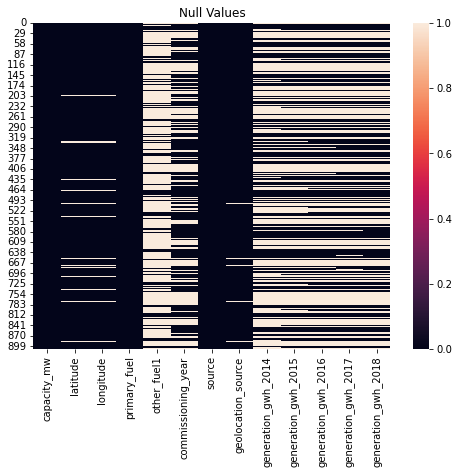

In [38]:
#Visualizing null values by heatmap

plt.figure(figsize=[8,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

* Huge amount of missing values in almost all columns and a few missing in latitude, longitude and geolocation_source.

## 2- Feature Engineering

### 2.1 Replacing commission_year with Plant_age

In [39]:
df["commissioning_year"].value_counts().sort_index()

1927.0     1
1937.0     1
1939.0     1
1943.0     1
1946.0     1
          ..
2014.0    17
2015.0    28
2016.0    19
2017.0    16
2018.0     6
Name: commissioning_year, Length: 73, dtype: int64

* We have datas till 2018 and 2019 column is null.

In [40]:
#using commissioning year to find the Power plant age estimating 2019 as data year

df['Power_plant_age'] = 2019 - df['commissioning_year']
df.drop(columns=["commissioning_year"],inplace=True)

### 2.2 Treating Missing Values

In [41]:
#checking skewness to impute missing value with median or mean

df.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
Power_plant_age        1.067949
dtype: float64

* We have skewness in all columns except for latitude.
* replacing all other skewed data, right or left will be replaced by median() and latitude which is normally distributed will be replaced by mean().

In [42]:
#replacing Nan values with mean and median for numerical columns

df["latitude"] = df["latitude"].fillna(df["latitude"].mean())
df["longitude"] = df["longitude"].fillna(df["longitude"].median())
df["Power_plant_age"] = df["Power_plant_age"].fillna(df["Power_plant_age"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())
df["generation_gwh_2018"] = df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].median())

In [43]:
#Replacing null values in categorical column with mode()

df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])

In [44]:
#rechecking if null values are treated

df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
Power_plant_age        0
dtype: int64

* **Hence our missing values are treated with imputation technique**

In [45]:
#my new dataset after feature engineering

df

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0            2.5   28.1839    73.2407        Solar         Oil   
1           98.0   24.7663    74.6090         Coal         Oil   
2           39.2   21.9038    69.3732         Wind         Oil   
3          135.0   23.8712    91.3602          Gas         Oil   
4         1800.0   21.9603    82.4091         Coal         Oil   
..           ...       ...        ...          ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil   
903          3.0   12.8932    78.1654        Solar         Oil   
904         25.5   15.2758    75.5811         Wind         Oil   
905         80.0   24.3500    73.7477         Coal         Oil   
906         16.5    9.9344    77.4768         Wind         Oil   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                       geolocation_source  generation_gwh_2014  \
0    National Renewable Energy Laboratory           801.123775   
1                                     WRI           801.123775   
2                                     WRI           801.123775   
3                                     WRI           617.789264   
4                                     WRI          3035.550000   
..                                    ...                  ...   
902                                   WRI           801.123775   
903                        Industry About           801.123775   
904                                   WRI           801.123775   
905                                   WRI           801.123775   
906                                   WRI           801.123775   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0             711.181225           737.205450           817.977250   
1             711.181225           737.205450           817.977250   
2             711.181225           737.205450           817.977250   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903           711.181225           737.205450           817.977250   
904           711.181225           737.205450           817.977250   
905           711.181225           737.205450           817.977250   
906           711.181225           737.205450           817.977250   

     generation_gwh_2018  Power_plant_age  
0             751.644375              8.0  
1             751.644375             18.0  
2             751.644375             18.0  
3             626.239128             15.0  
4            7279.000000              4.0  
..                   ...              ...  
902           686.500000              3.0  
903           751.644375             18.0  
904           751.644375             18.0  
905           751.644375             18.0  
906           751.644375             18.0  

[907 rows x 13 columns]

In [46]:
#Checking unique values of target column

df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [47]:
#Checking unique values of target column

sorted(df['capacity_mw'].unique())

[0.0,
 1.0,
 1.5,
 1.7,
 1.8,
 2.0,
 2.1,
 2.25,
 2.4,
 2.5,
 3.0,
 3.3,
 3.6,
 3.75,
 4.0,
 4.2,
 4.25,
 4.5,
 4.8,
 5.0,
 5.2,
 5.8,
 6.0,
 6.25,
 6.3,
 6.6,
 7.2,
 7.5,
 8.0,
 8.4,
 8.5,
 9.0,
 9.3,
 9.35,
 9.7,
 9.9,
 10.0,
 10.25,
 10.5,
 11.0,
 11.2,
 11.6,
 12.0,
 12.27,
 12.5,
 12.8,
 12.96,
 13.2,
 13.5,
 14.4,
 14.65,
 14.85,
 15.0,
 15.2,
 15.5,
 16.0,
 16.5,
 16.95,
 17.0,
 17.2,
 17.5,
 18.0,
 18.7,
 18.9,
 19.0,
 19.7,
 19.8,
 20.0,
 20.4,
 20.8,
 21.0,
 21.8,
 21.84,
 22.0,
 22.5,
 22.8,
 23.1,
 24.0,
 24.8,
 25.0,
 25.2,
 25.5,
 25.6,
 25.7,
 25.8,
 26.0,
 26.4,
 27.3,
 27.65,
 28.0,
 28.2,
 28.3,
 29.0,
 29.6,
 30.0,
 30.5,
 30.6,
 30.75,
 31.2,
 31.4,
 31.5,
 32.0,
 32.5,
 32.8,
 33.0,
 33.2,
 33.6,
 33.75,
 34.0,
 34.4,
 34.65,
 35.0,
 35.1,
 35.2,
 36.0,
 36.3,
 36.8,
 37.5,
 37.6,
 38.5,
 39.0,
 39.2,
 40.0,
 41.0,
 41.4,
 42.0,
 42.5,
 43.0,
 44.0,
 45.0,
 45.5,
 46.0,
 48.0,
 49.0,
 49.6,
 50.0,
 50.4,
 50.7,
 51.0,
 52.5,
 52.8,
 54.0,
 54.5,
 55.0,
 56.25,
 59.

In [48]:
#describing the dataset

df.describe(include='all')

capacity_mw    latitude   longitude primary_fuel other_fuel1  \
count    907.000000  907.000000  907.000000          907         907   
unique          NaN         NaN         NaN            8           3   
top             NaN         NaN         NaN         Coal         Oil   
freq            NaN         NaN         NaN          258         904   
mean     326.223755   21.197918   77.427103          NaN         NaN   
std      590.085456    6.079148    4.815073          NaN         NaN   
min        0.000000    8.168900   68.644700          NaN         NaN   
25%       16.725000   17.072000   74.388900          NaN         NaN   
50%       59.200000   21.281800   76.719500          NaN         NaN   
75%      385.250000   25.176450   79.206100          NaN         NaN   
max     4760.000000   34.649000   95.408000          NaN         NaN   

                               source geolocation_source  generation_gwh_2014  \
count                             907                907           907.000000   
unique                            191                  3                  NaN   
top     Central Electricity Authority                WRI                  NaN   
freq                              519                784                  NaN   
mean                              NaN                NaN          1516.689956   
std                               NaN                NaN          2785.604307   
min                               NaN                NaN             0.000000   
25%                               NaN                NaN           801.123775   
50%                               NaN                NaN           801.123775   
75%                               NaN                NaN           801.123775   
max                               NaN                NaN         28127.000000   

        generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
count            907.000000           907.000000           907.000000   
unique                  NaN                  NaN                  NaN   
top                     NaN                  NaN                  NaN   
freq                    NaN                  NaN                  NaN   
mean            1510.071296          1565.361383          1657.121797   
std             2984.994556          3005.087210          3046.862910   
min                0.000000             0.000000             0.000000   
25%              711.181225           737.205450           817.977250   
50%              711.181225           737.205450           817.977250   
75%              711.181225           737.205450           817.977250   
max            30539.000000         30015.000000         35116.000000   

        generation_gwh_2018  Power_plant_age  
count            907.000000       907.000000  
unique                  NaN              NaN  
top                     NaN              NaN  
freq                    NaN              NaN  
mean            1665.011030        20.271224  
std             3168.826750        13.158621  
min                0.000000         1.000000  
25%              751.644375        16.000000  
50%              751.644375        18.000000  
75%              751.644375        21.000000  
max            35136.000000        92.000000

**Observations:**

* We have Plant age from 1 year to 92 years. i.e we have plant working for 92 years
* we have minimum value as 0 for most of the column
* We have coal as top in primary_fuel
* We have oil as top for other fuel1
* We have Central Electricity Authority as top source
* We have WRI as top geolocation_source

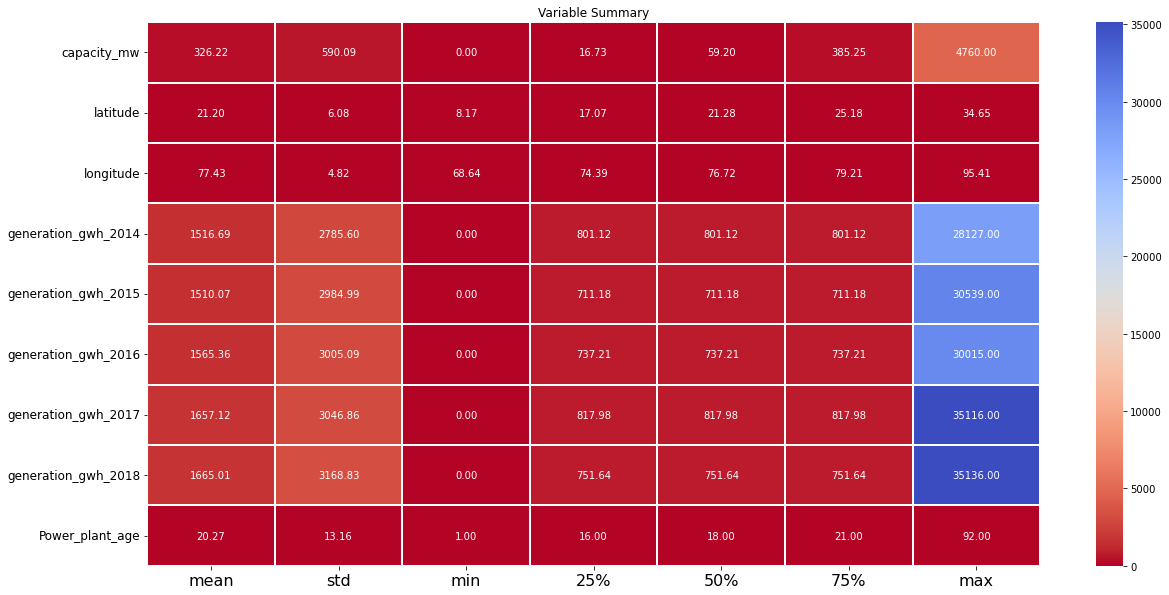

In [49]:
#Heatmap of the Descibe function

plt.figure(figsize=(20,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.2f',cmap='coolwarm_r')
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.title('Variable Summary')
plt.show()

* The above heatmap shows that few of the Max values are way beyong the mean and median. There may be **outliers present in the data**.
* Mean and median are different for a few columns. This shows **we have skewness in the data**.

## 3- Data Visualization

### 3.1 Univariate Analysis

#### We have numerical and Categorical Data

In [50]:
cat_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_cols.append(i)
print(cat_cols)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [51]:
# Now checking for numerical columns
num_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_cols.append(i)
print(num_cols)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


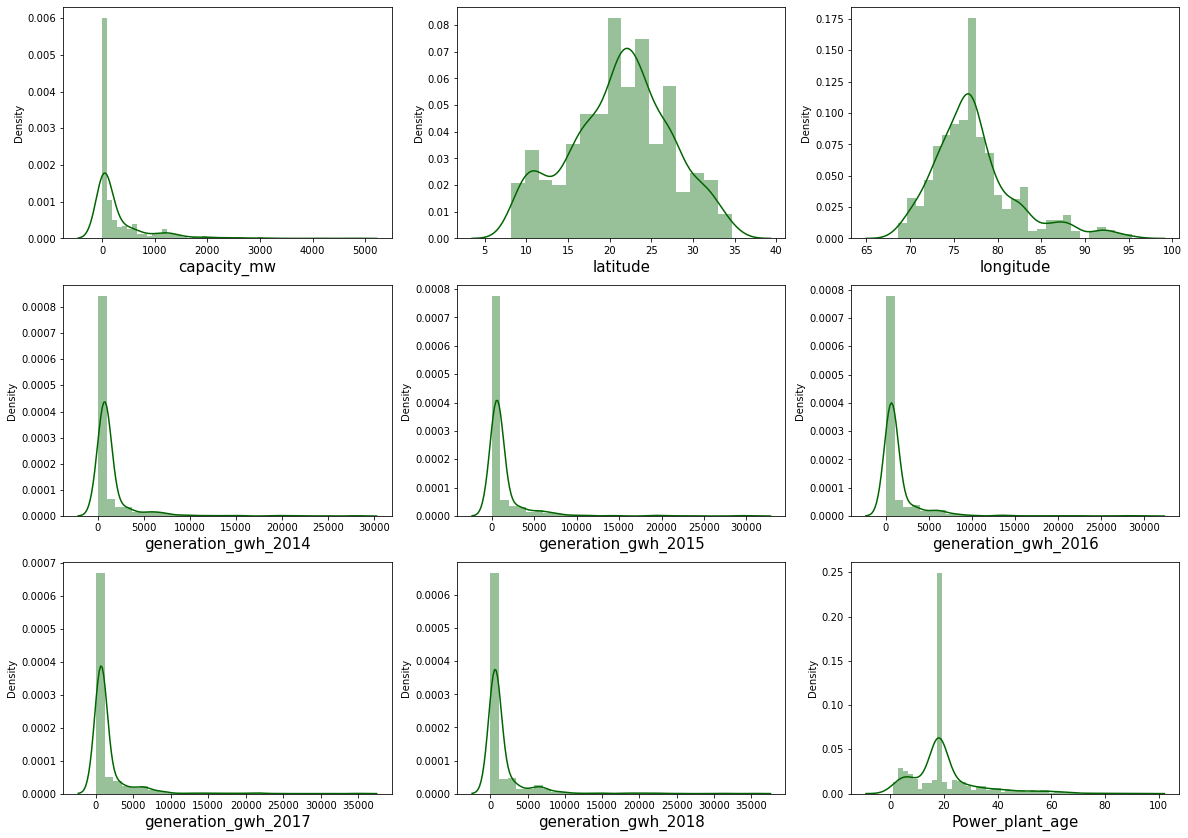

In [52]:
#Q1 What is the distribution of data for numerical columns?

plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1

for i in df[num_cols]:
    if plotnumber<=24 :
        ax = plt.subplot(8,3,plotnumber)
        sns.distplot(df[i],color='darkgreen')
        plt.xlabel(i,fontsize=15)
       
    plotnumber+=1
plt.show()

* Most of the features are right skewed.
* Latitude is normally distributed

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

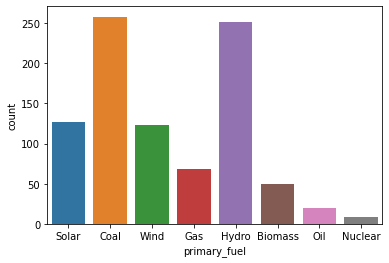

In [53]:
#Q2 What is the count of data for Categorical columns?

sns.countplot(df["primary_fuel"])

* We have Coal followed by Hydro as our top primary fuel in the dataset.
* The least count is for Nuclear and second least is Oil.
* Other primary fuels as per dataset are Solar, wind Gas and Biomass

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

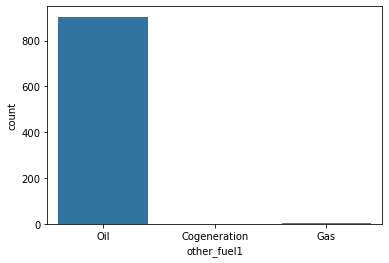

In [54]:
sns.countplot(df["other_fuel1"])

It shows that mostly the Plant uses Oil as other_fuel.

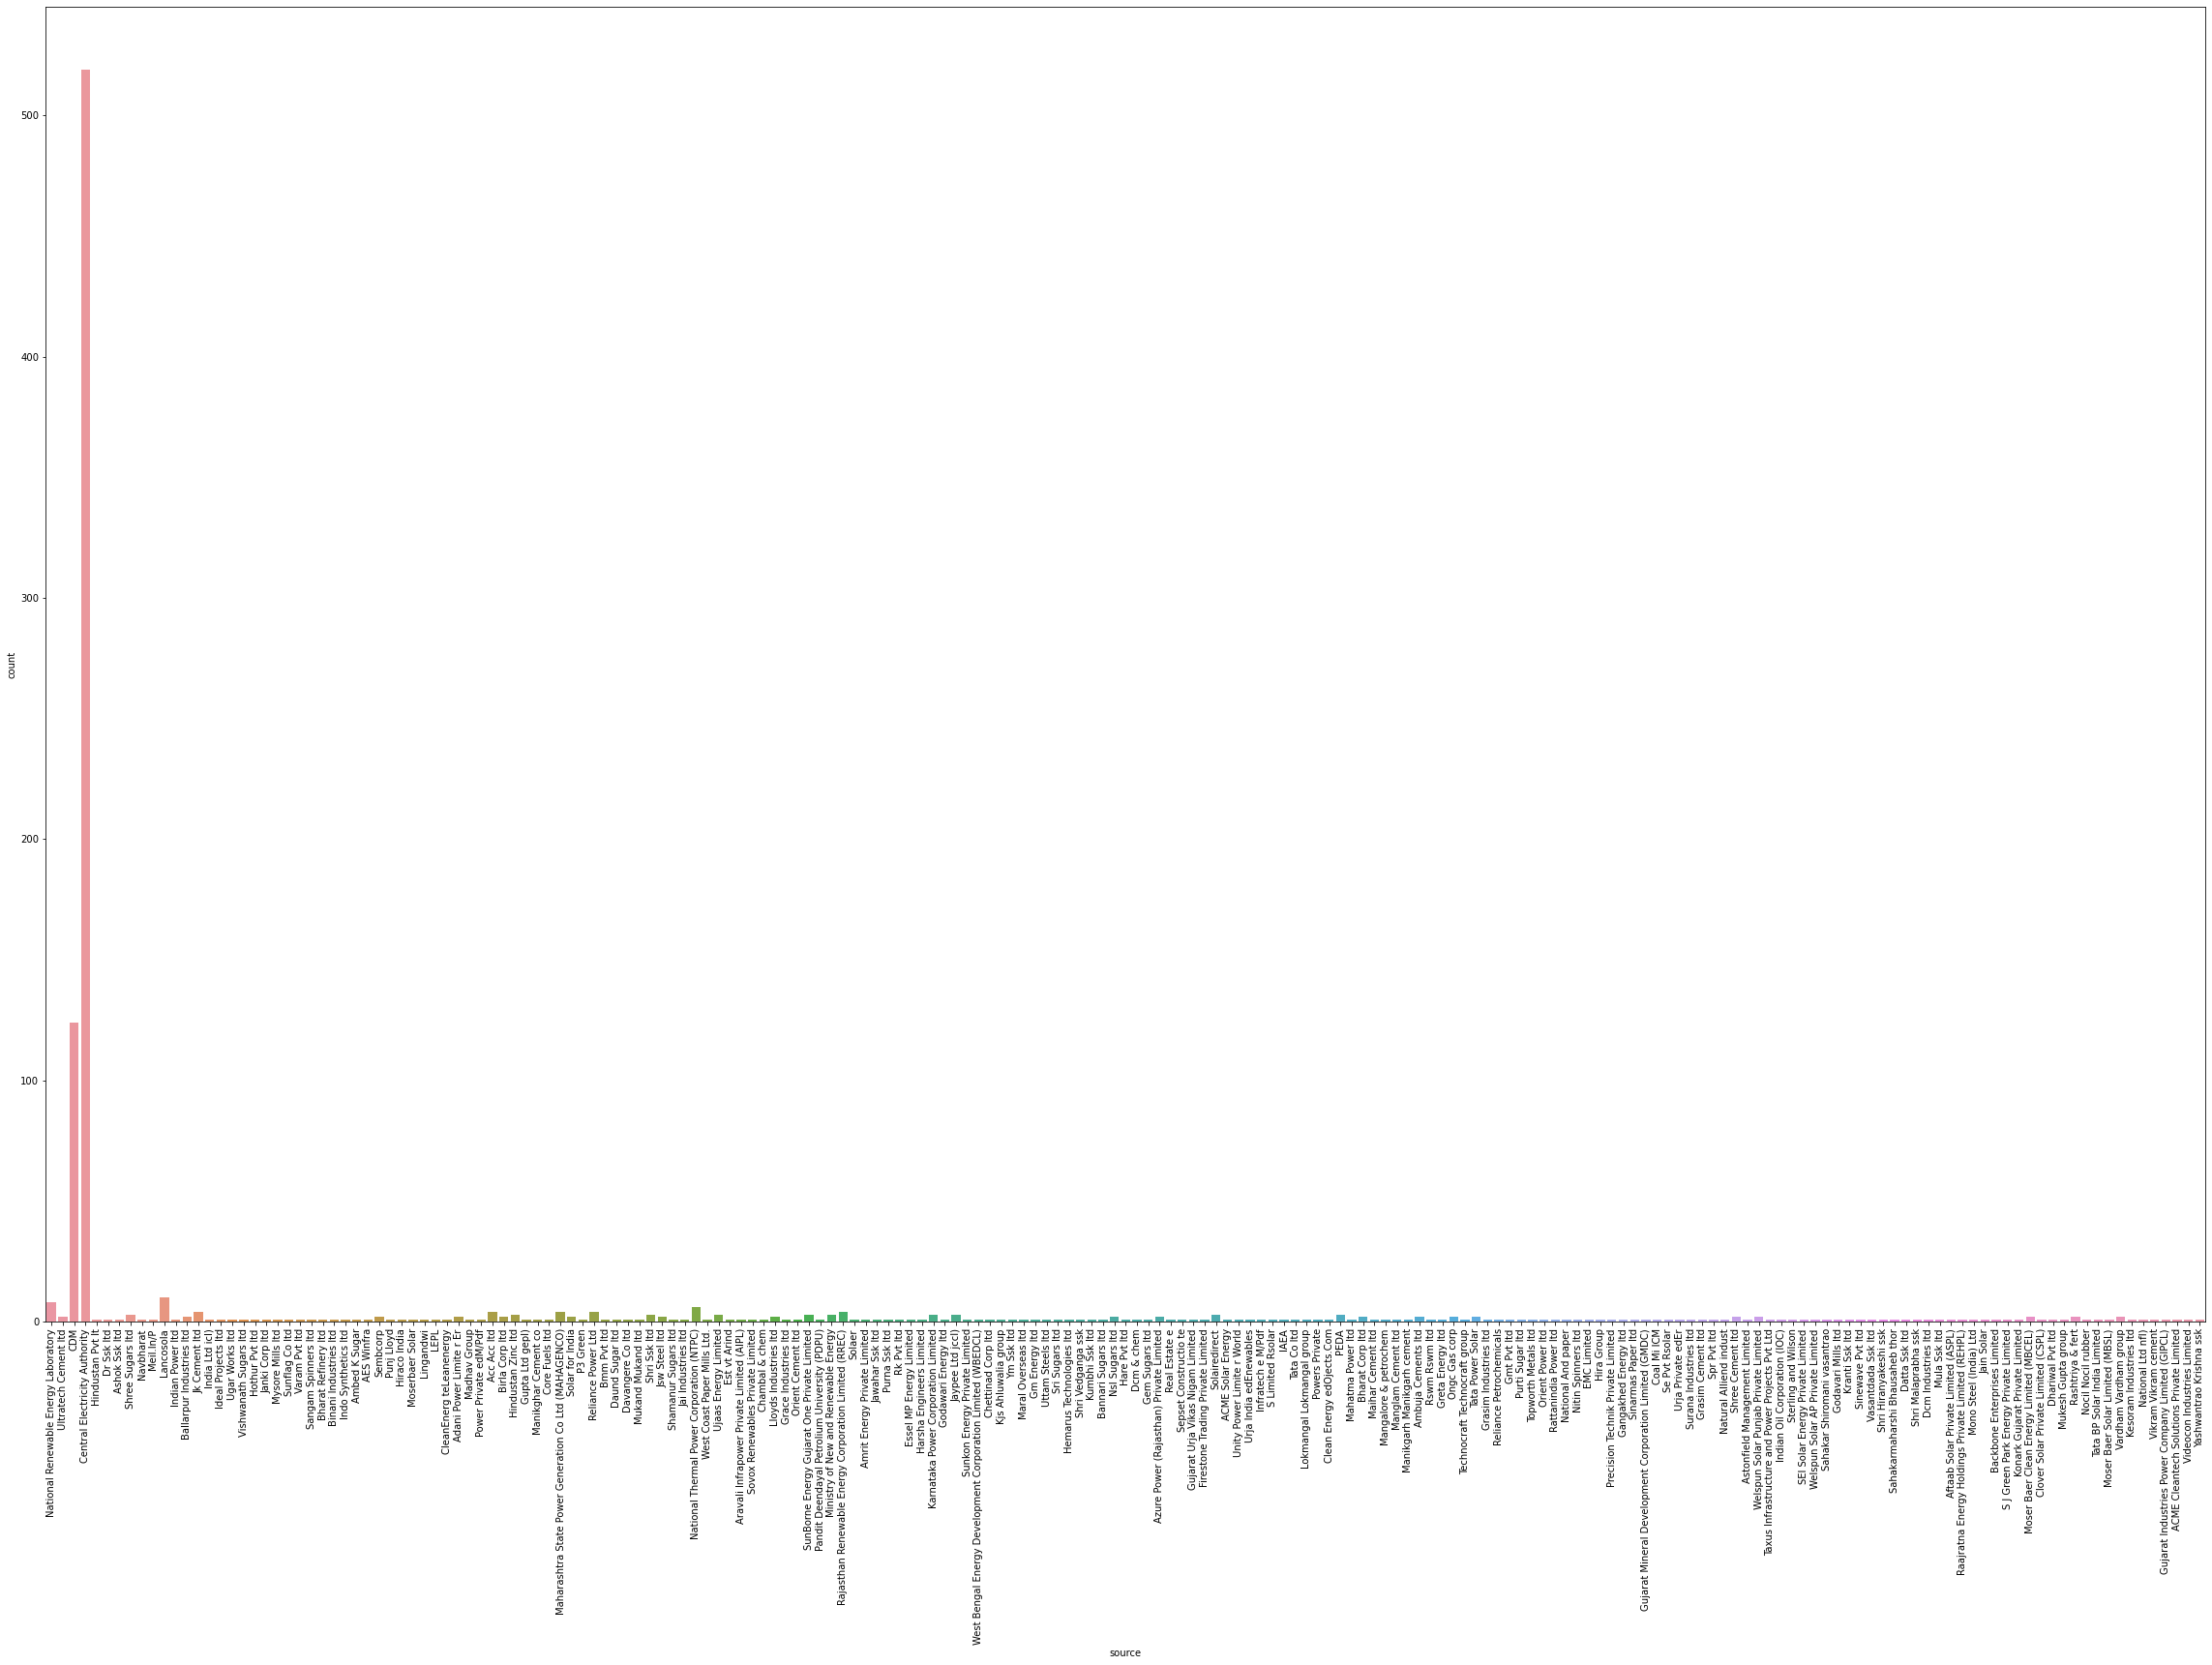

In [55]:
plt.figure(figsize=(40,25))
sns.countplot(df['source'])
plt.xticks(rotation = 90)
plt.show()

We have Central Electrical Authority as top source

In [56]:
df['geolocation_source'].value_counts()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

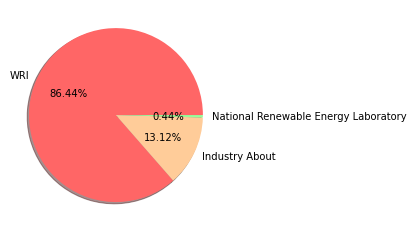

In [57]:
colors=['#ff6666', '#ffcc99', '#99ff99']
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots()
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', colors=colors,shadow=True)
plt.show()

We have WRI as top geolocation_source and National Renewable Energy Laboratory as the least

### 3.2 Bivariate Analysis

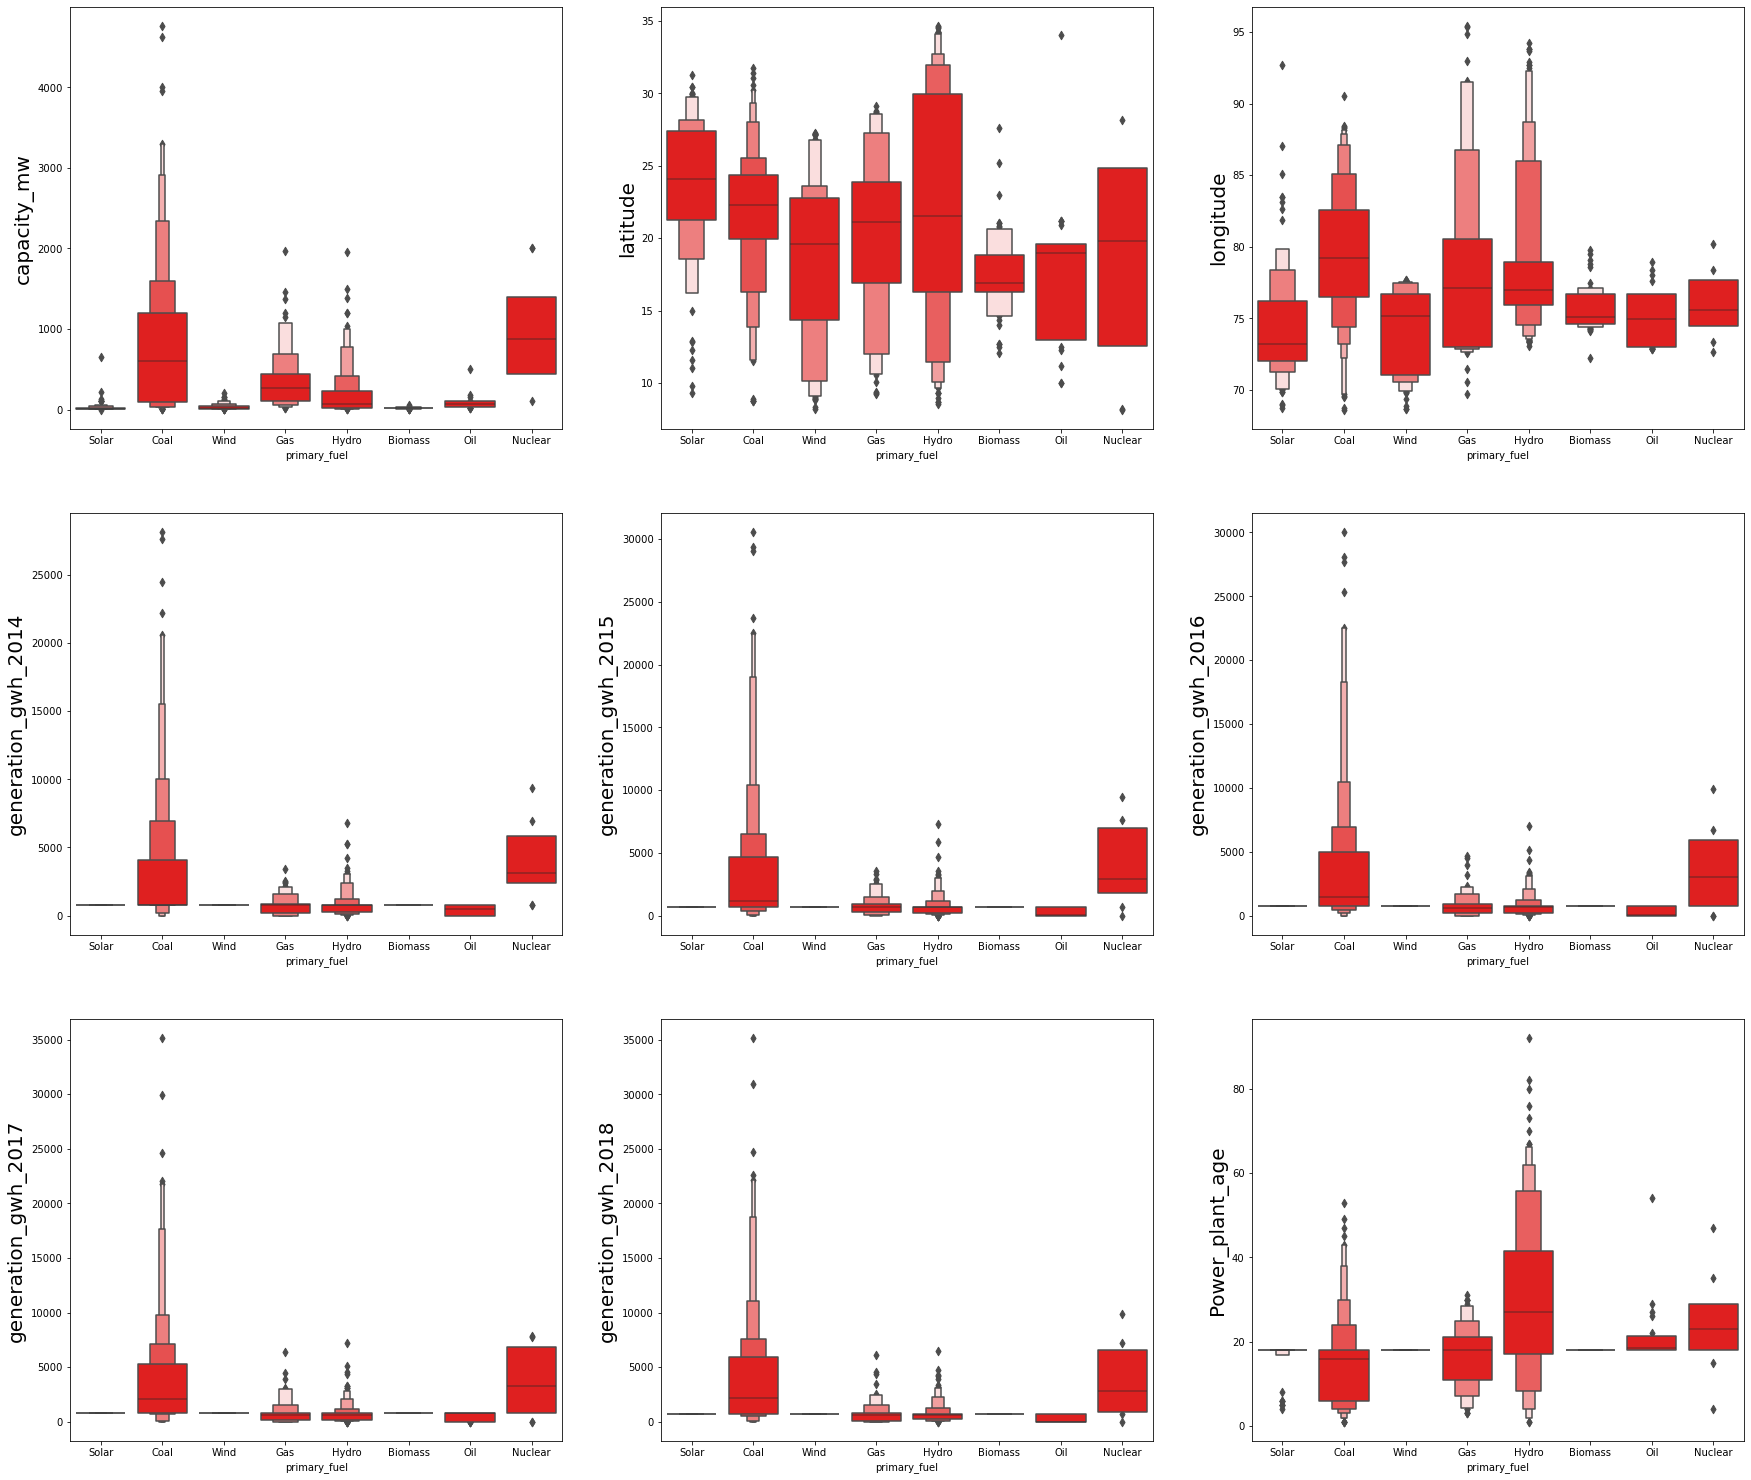

In [58]:
#Q3- What is the relation between numerical columns and the Target Variable?(Boxen plot)
#taking primary_fuel as target

plt.figure(figsize=(30,45), facecolor='white')
plotnumber = 1

for i in df[num_cols]:
    if plotnumber<=24 :
        ax = plt.subplot(5,3,plotnumber)
        sns.boxenplot(x=df.primary_fuel,y=df[i],color='red')
        plt.ylabel(i,fontsize=20)
       
    plotnumber+=1
plt.show()

**OBSERVATIONS**

* We can see **many outliers** in the data.
* While compaing **capacity_mw and primary_fuel, Coal has the large number** of data and more concentration is for capacity between 100 to 1200.
* **Nuclear have only few data** but its electrical generating capacity is concentrated **between 500 to 1500.**
* **Electricity generation for 2014,2015,2016,2017,2018** shows that **Coal has the large number** of data and Electricity generation reported is concentrated more between **100 to 5000.**
* We can see from the above plot that **Electricity generated from Coal is upto 30,000** in years till 2016 and **more than 35000 in years 2017 and 2018.**
* The **Data for Nuclear are less** but the electricity generation is between **100 to 7000** in all years.
* We have only very few **(less than 5) counts of data for primary fuel Solar, Biomass and wind** and Electricity generated is **minimum**.
* By looking at the plot between **Plant age and primary_fuel** we can see that as **age increases,** the plant have **hydro electricity more** and concentrated between **18 to 40 years.**
* Most of the plants having primary fuel as **Coal is of age 8 to 20 years**.
* We have **nuclear power plants** which are running since **20 years to 30 years** while we have few of the data as **outliers from 2 years and max of 45 years age.**

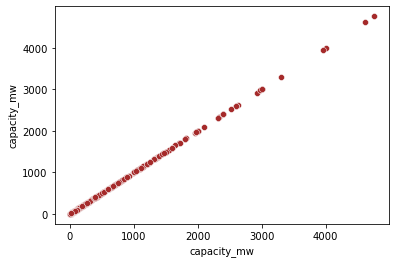

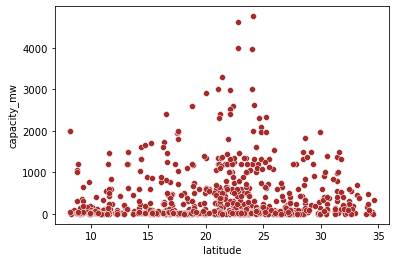

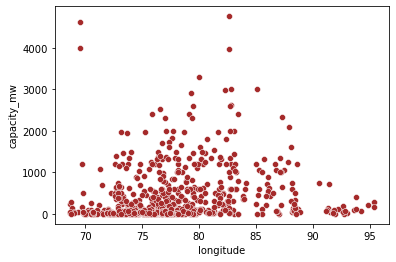

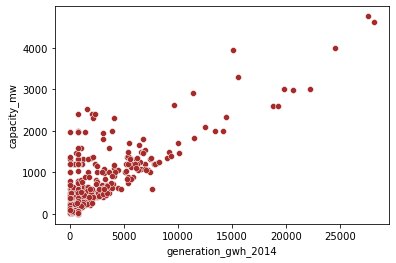

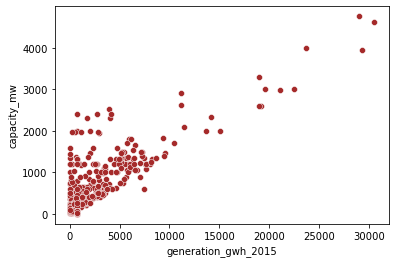

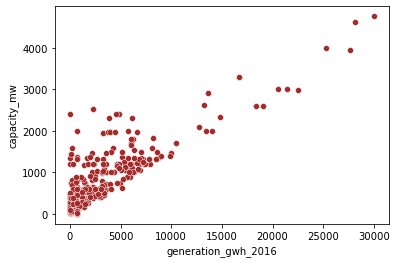

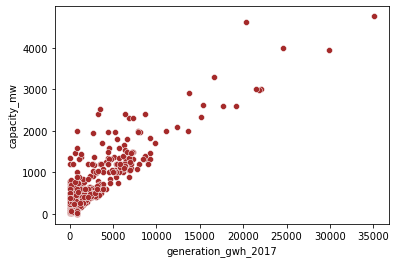

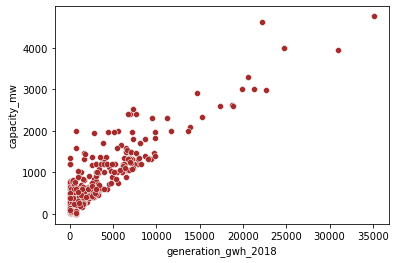

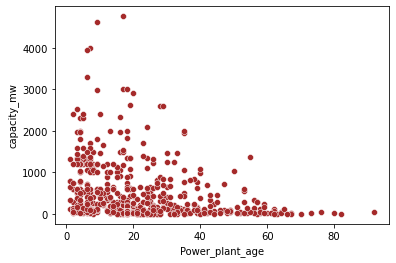

In [59]:
#Q4- What is the relation between numerical columns and the Target Variable?(scatterplot)
# taking capacity_mw as target

for i in df[num_cols]:
    plt.figure()
    sns.scatterplot(x=df[i],y=df.capacity_mw,color='brown')

**OBSERVATIONS:**

* In Latitude between 20 to 25 and longitude between 80 to 85 Capacity is much higher. This shows that plants which produces more are located in those areas.
* As Electricity generation increases, Capacity also increases with values concentrating more between 0 to 2000.
* Large number of plants are of 0 to 20 years and capacity is also more in these plants.

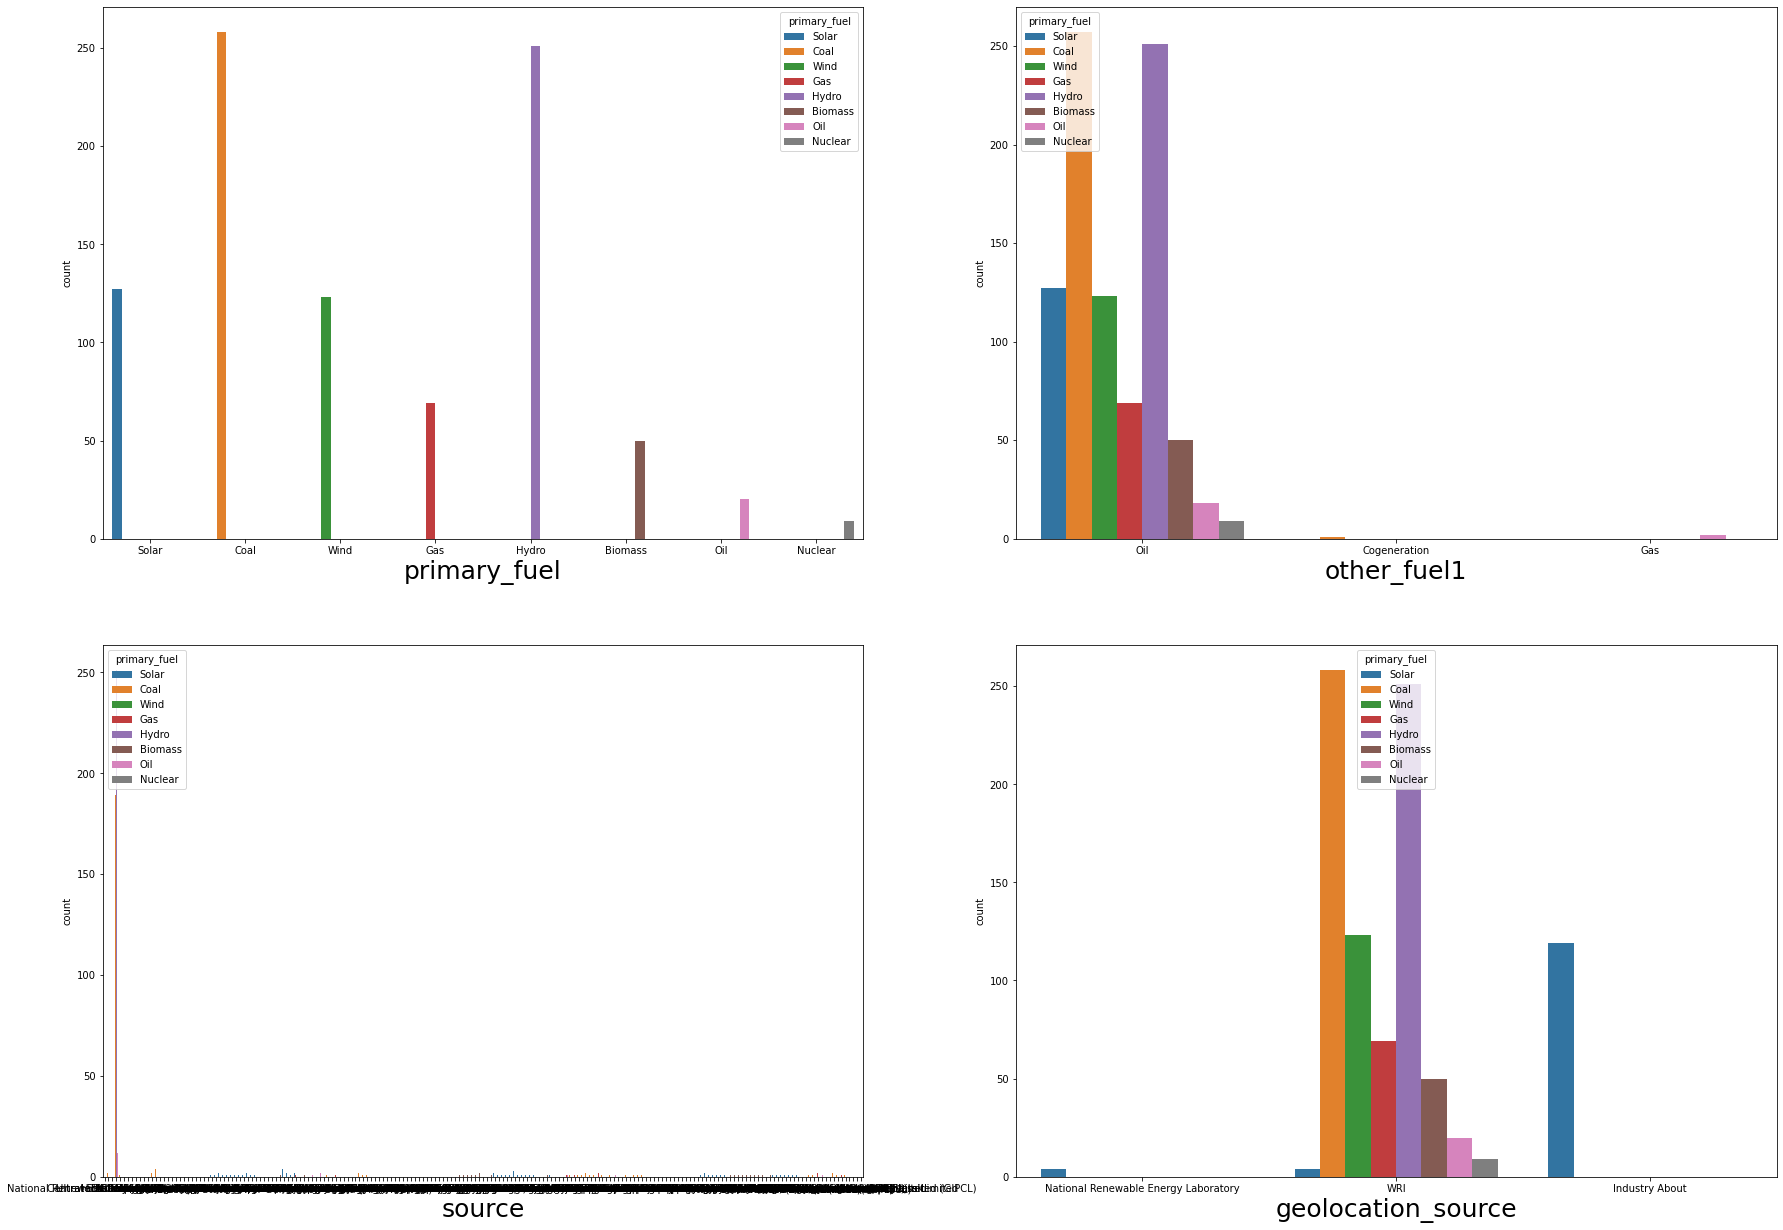

In [60]:
#Q5- What is the relationship between Categorical columns and Target variable?
#taking primary_fuel as target

plt.figure(figsize=(30,45), facecolor='white')
plotnumber = 1

for i in df[cat_cols]:
    if plotnumber<=24 :
        ax = plt.subplot(4,2,plotnumber)
        sns.countplot(x=df[i],hue=df.primary_fuel)
        plt.xlabel(i,fontsize=25)
       
    plotnumber+=1
plt.show()

**OBSERVATIONS:**

* In other_fuel1 I can see that **Energy source used in most of the plant is Oil** and very few plants use Cogeneration and Gas.
* **Energy souce- Cogeneration** which has less data also produces **coal** as primary fuel.
* Plant which uses **Gas as the Energy source have Oil as thier primary fuel**.
* We have 191 sources and one of the entity which report more data says Coal is the primary_fuel of those.
* As per the geolocation and primary fuel plot, **top is WRI and Coal followed by Hydro are the primary fuel**.
* The other geolocation_sources- National Renewable Energy Lab and Industry about have Primary fuel as Solar.

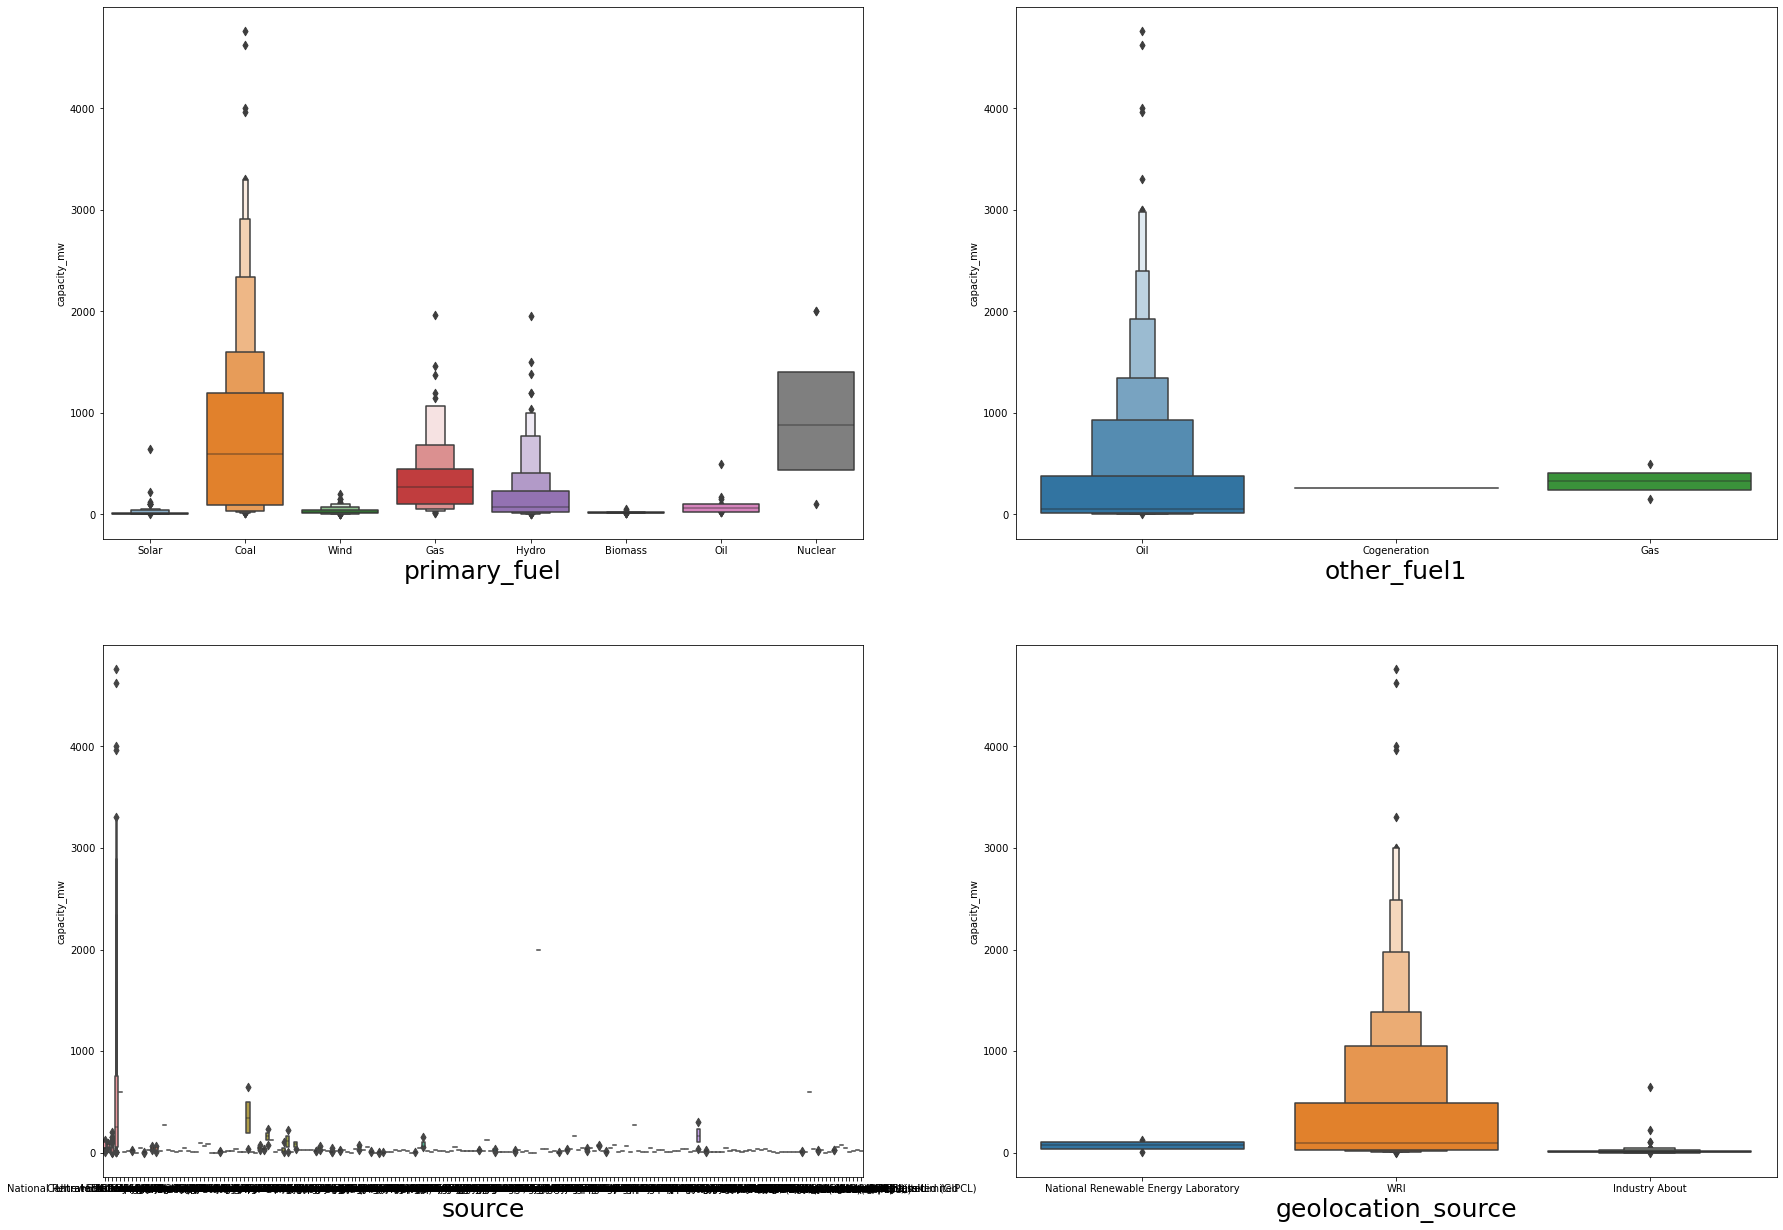

In [61]:
#Q6- What is the relationship between Categorical columns and Target variable?
#taking capacity as target

plt.figure(figsize=(30,45), facecolor='white')
plotnumber = 1

for i in df[cat_cols]:
    if plotnumber<=24 :
        ax = plt.subplot(4,2,plotnumber)
        sns.boxenplot(x=df[i],y=df.capacity_mw)
        plt.xlabel(i,fontsize=25)
       
    plotnumber+=1
plt.show()

**OBSERVATIONS:**

* While comparing primary_fuel and Capacity we can see that Coal is the primary fuel which also has the largest capacity in mw of upto 5000.
* We can see that Nuclear uses capacity from 500 to 7000.
* Least data for solar, wind and Biomass.
* Gas,Hydro and Nuclear uses Capacity of Maximum 2000 mw.
* The other Fuel used for Electricity generation has more data in Oil and capacity is more concentrated between 0 to 500.
* The other fuel which uses Gas for Energy generation uses capacity between 400 to 700.
* Most of the data in geolocation source is of WRI and it uses 0 to 500 mw of capacity more than other values.

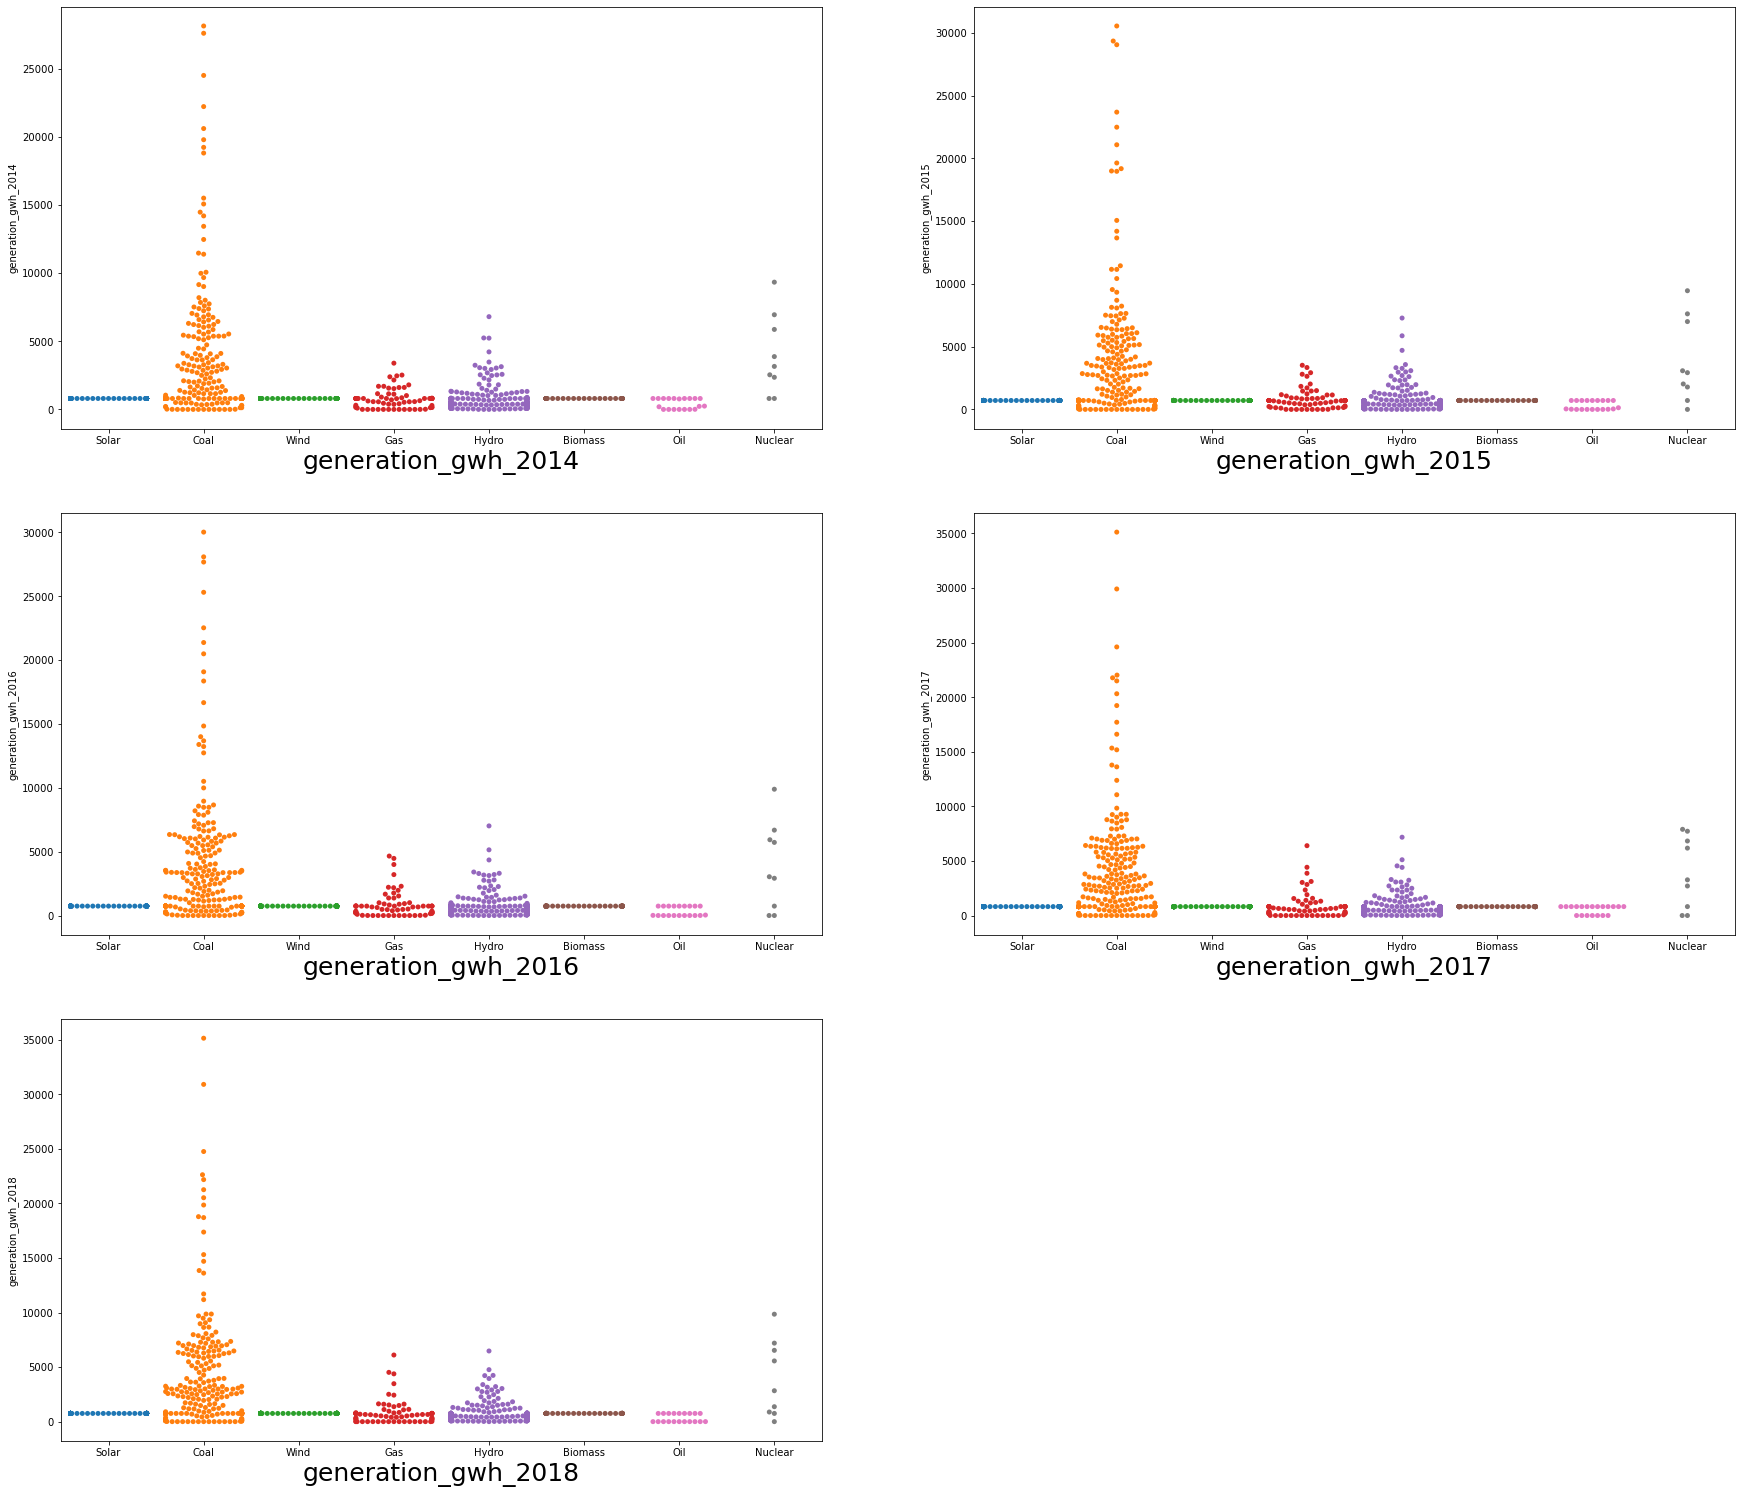

In [62]:
#Q7- In which year the Energy generated is highest and which type of fuel is used?

plt.figure(figsize=(30,45), facecolor='white')
plotnumber = 1
Years=["generation_gwh_2014", "generation_gwh_2015","generation_gwh_2016",
                            "generation_gwh_2017","generation_gwh_2018"]

for i in df[Years]:
    if plotnumber<=24 :
        ax = plt.subplot(5,2,plotnumber)
        sns.swarmplot(y=df[i],x=df.primary_fuel)
        plt.xlabel(i,fontsize=25)
       
    plotnumber+=1
plt.show()

**As per the above plot, Energy generated in the year 2017 and 2018 is the highest with values almost 36000mw**

### 3.3 Multivariate Analysis

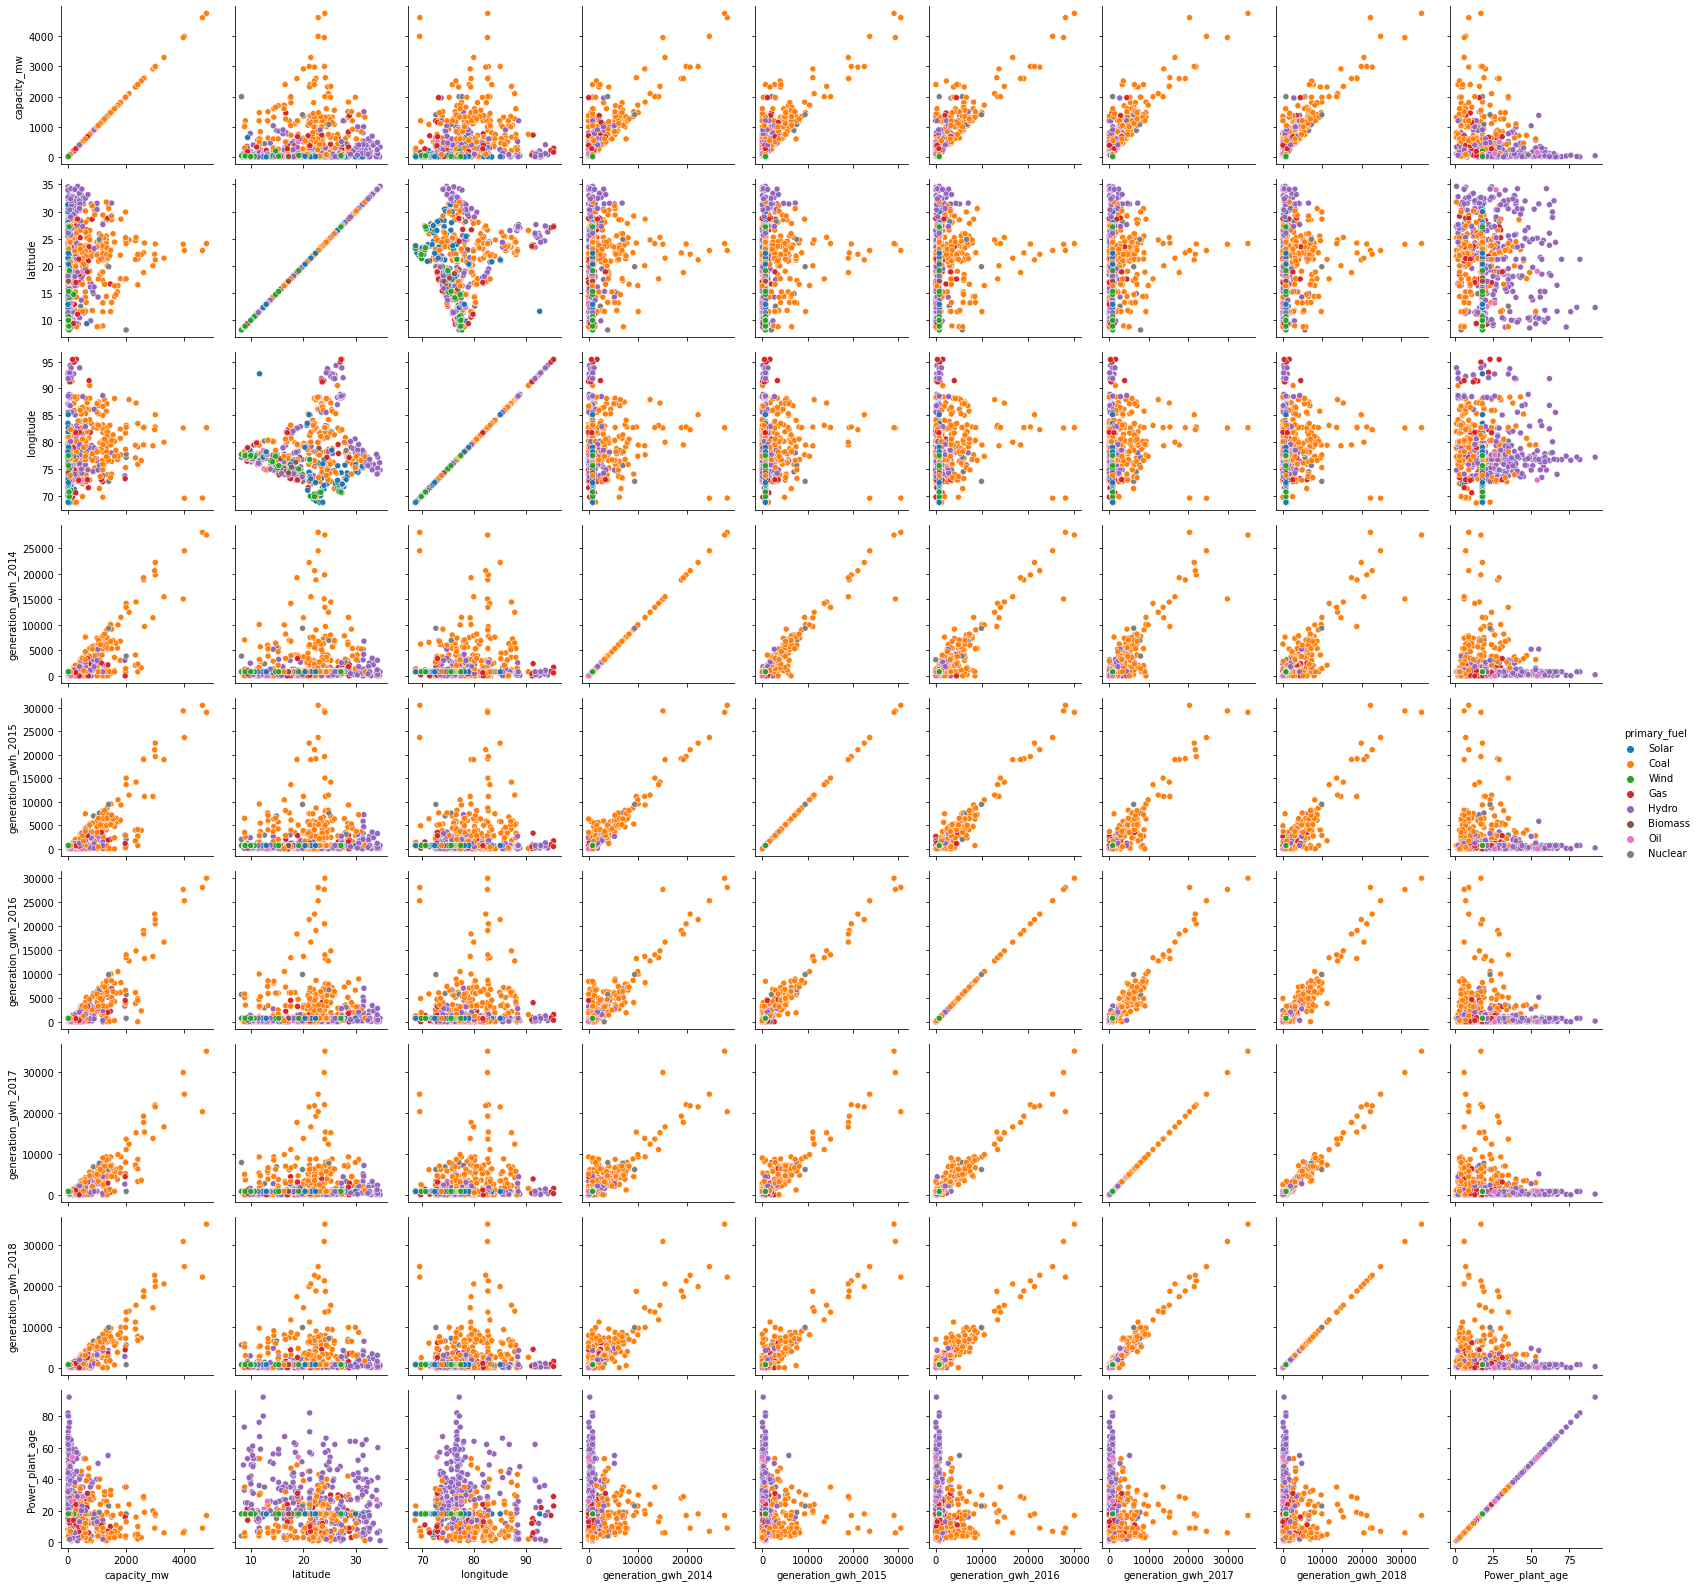

In [63]:
#Q8- Observe the Comparison between variables?

g = sns.PairGrid(df , hue = 'primary_fuel')
g = g.map(sns.scatterplot)
g.add_legend()

**OBSERVATIONS:**
* The first thing I noticed is the **Indian map in Latitude** and inverce map in Longitude. That really amused me.
* Multicollinearity is present in the data.
* There are huge number of outliers in the dataset.
* We can see positive corelation between variables.

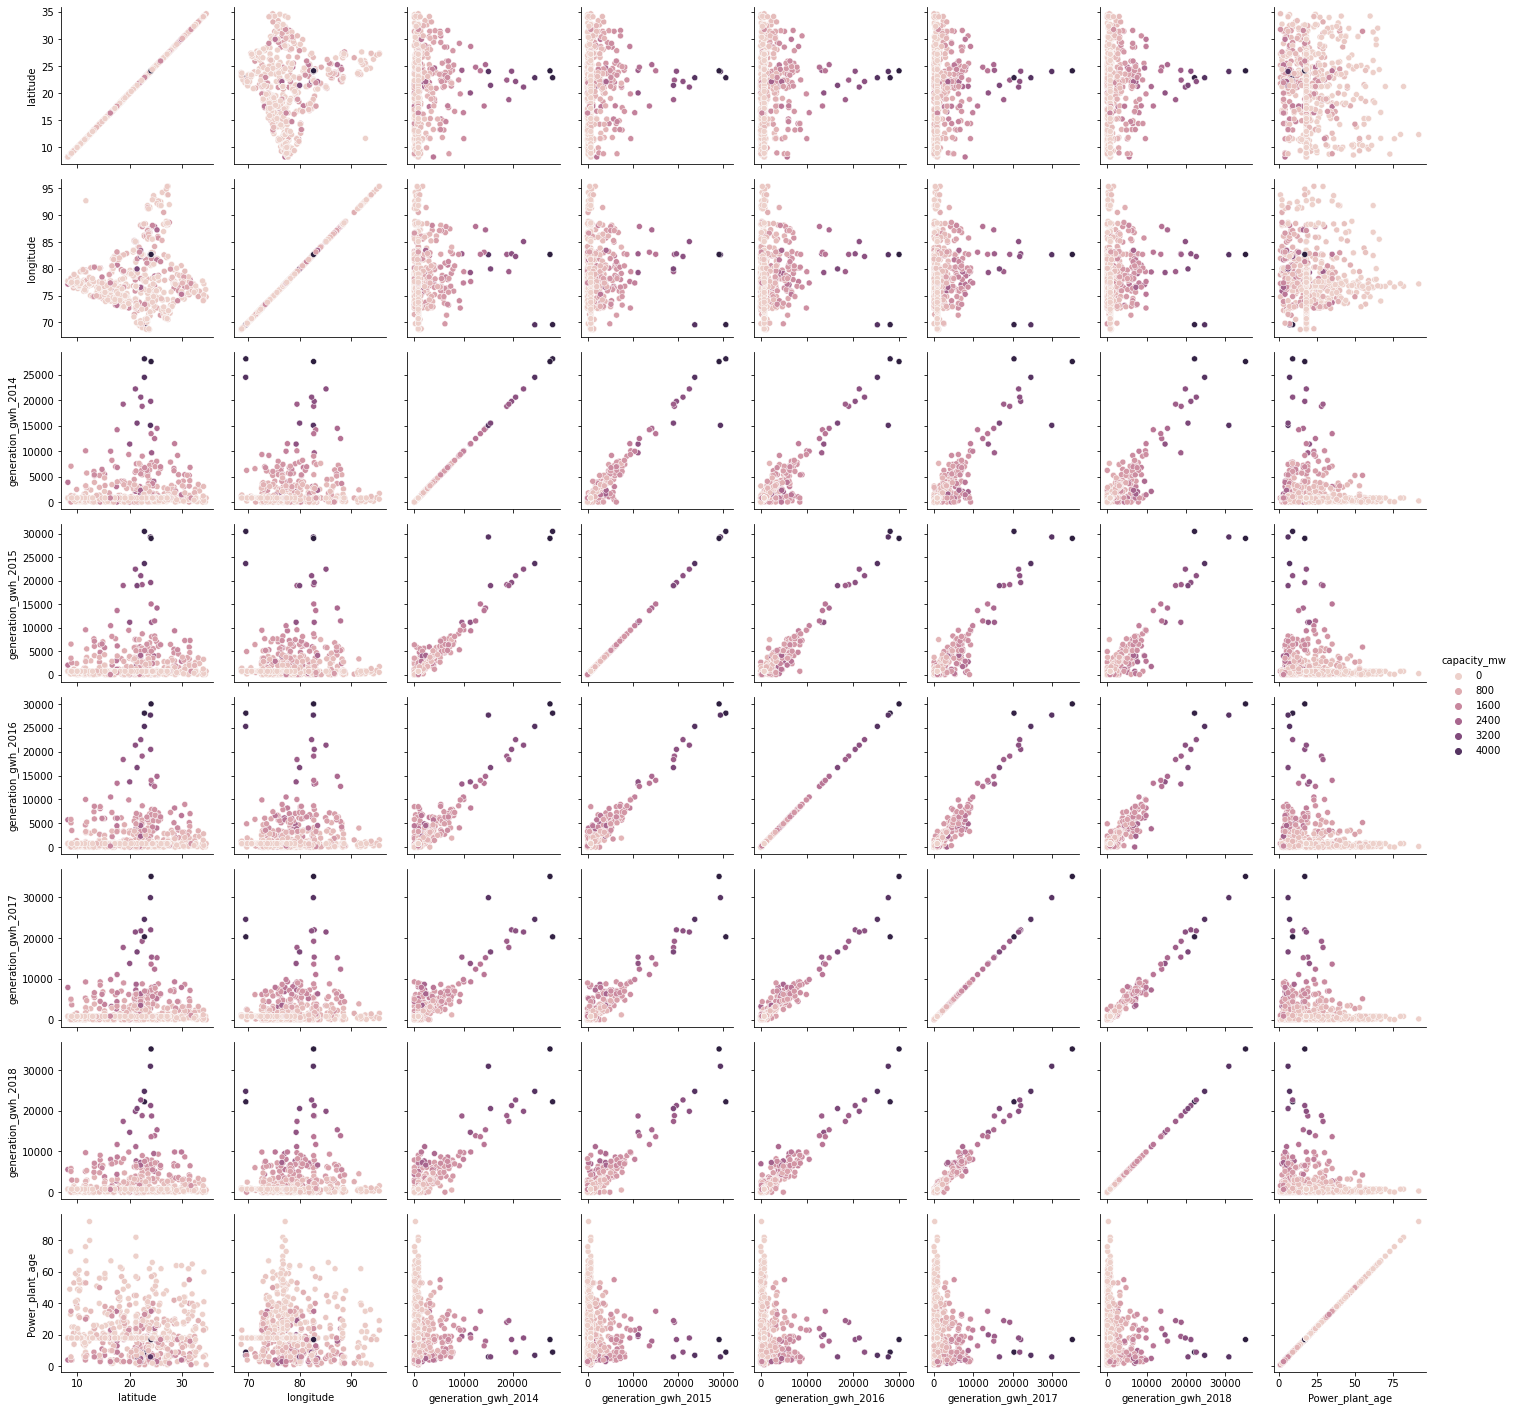

In [64]:
g = sns.PairGrid(df , hue = 'capacity_mw')
g = g.map(sns.scatterplot)
g.add_legend()

* Most of the data uses capacity of 0 to 1000 mw.
* We can see positive corelation between variables and target.
* In certain middle part of India capacity upto 4000 is used.

## 4- Data Cleaning

### 4.1 Outliers Removal

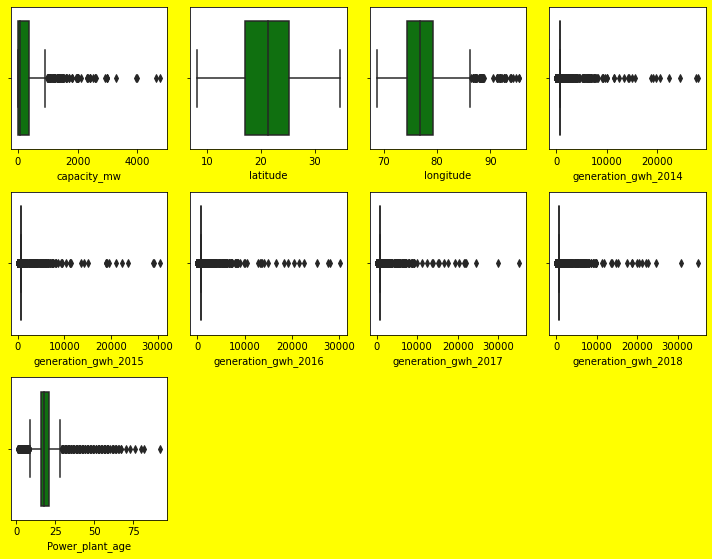

In [65]:
plt.figure(figsize=(10,10),facecolor='yellow')
graph=1 

for column in num_cols:

    plt.subplot(4,4,graph)

    sns.boxplot(df[column],color='green',orient='h')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()


**Except for Latitude, all other variables have large number of outliers.**

In [66]:
out_cols= df[['capacity_mw','longitude', 'generation_gwh_2014', 
           'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 
           'generation_gwh_2018', 'Power_plant_age']]

from scipy.stats import zscore

z=np.abs(zscore(out_cols))
df_new=df[(z<3).all(axis=1)]
df_new

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0            2.5   28.1839    73.2407        Solar         Oil   
1           98.0   24.7663    74.6090         Coal         Oil   
2           39.2   21.9038    69.3732         Wind         Oil   
3          135.0   23.8712    91.3602          Gas         Oil   
4         1800.0   21.9603    82.4091         Coal         Oil   
..           ...       ...        ...          ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil   
903          3.0   12.8932    78.1654        Solar         Oil   
904         25.5   15.2758    75.5811         Wind         Oil   
905         80.0   24.3500    73.7477         Coal         Oil   
906         16.5    9.9344    77.4768         Wind         Oil   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                       geolocation_source  generation_gwh_2014  \
0    National Renewable Energy Laboratory           801.123775   
1                                     WRI           801.123775   
2                                     WRI           801.123775   
3                                     WRI           617.789264   
4                                     WRI          3035.550000   
..                                    ...                  ...   
902                                   WRI           801.123775   
903                        Industry About           801.123775   
904                                   WRI           801.123775   
905                                   WRI           801.123775   
906                                   WRI           801.123775   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0             711.181225           737.205450           817.977250   
1             711.181225           737.205450           817.977250   
2             711.181225           737.205450           817.977250   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903           711.181225           737.205450           817.977250   
904           711.181225           737.205450           817.977250   
905           711.181225           737.205450           817.977250   
906           711.181225           737.205450           817.977250   

     generation_gwh_2018  Power_plant_age  
0             751.644375              8.0  
1             751.644375             18.0  
2             751.644375             18.0  
3             626.239128             15.0  
4            7279.000000              4.0  
..                   ...              ...  
902           686.500000              3.0  
903           751.644375             18.0  
904           751.644375             18.0  
905           751.644375             18.0  
906           751.644375             18.0  

[846 rows x 13 columns]

In [67]:
print('old data shape:',df.shape)
print('new data shape:',df_new.shape)

old data shape: (907, 13)
new data shape: (846, 13)


In [68]:
#checking the loss percentage

loss_percentage=(((907-846)/907)*100)
loss_percentage

6.725468577728775

Since dataloss is 6.7% which is less than 10 we can proceed with this.

### 4.2 Encoding

In [69]:
cat_cols=["primary_fuel","other_fuel1","source","geolocation_source"]

In [70]:
#Encoding the categorical columns:

from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in cat_cols:
    df_new[i]=enc.fit_transform(df_new[i].values.reshape(-1,1))

In [71]:
df_new

capacity_mw  latitude  longitude  primary_fuel  other_fuel1  source  \
0            2.5   28.1839    73.2407           6.0          2.0   109.0   
1           98.0   24.7663    74.6090           1.0          2.0   174.0   
2           39.2   21.9038    69.3732           7.0          2.0    21.0   
3          135.0   23.8712    91.3602           2.0          2.0    22.0   
4         1800.0   21.9603    82.4091           1.0          2.0    22.0   
..           ...       ...        ...           ...          ...     ...   
902       1600.0   16.2949    77.3568           1.0          2.0    22.0   
903          3.0   12.8932    78.1654           6.0          2.0    77.0   
904         25.5   15.2758    75.5811           7.0          2.0    21.0   
905         80.0   24.3500    73.7477           1.0          2.0    59.0   
906         16.5    9.9344    77.4768           7.0          2.0    21.0   

     geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0                   1.0           801.123775           711.181225   
1                   2.0           801.123775           711.181225   
2                   2.0           801.123775           711.181225   
3                   2.0           617.789264           843.747000   
4                   2.0          3035.550000          5916.370000   
..                  ...                  ...                  ...   
902                 2.0           801.123775             0.994875   
903                 0.0           801.123775           711.181225   
904                 2.0           801.123775           711.181225   
905                 2.0           801.123775           711.181225   
906                 2.0           801.123775           711.181225   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0             737.205450           817.977250           751.644375   
1             737.205450           817.977250           751.644375   
2             737.205450           817.977250           751.644375   
3             886.004428           663.774500           626.239128   
4            6243.000000          5385.579736          7279.000000   
..                   ...                  ...                  ...   
902           233.596650           865.400000           686.500000   
903           737.205450           817.977250           751.644375   
904           737.205450           817.977250           751.644375   
905           737.205450           817.977250           751.644375   
906           737.205450           817.977250           751.644375   

     Power_plant_age  
0                8.0  
1               18.0  
2               18.0  
3               15.0  
4                4.0  
..               ...  
902              3.0  
903             18.0  
904             18.0  
905             18.0  
906             18.0  

[846 rows x 13 columns]

This is my new dataset

### 4.3 Correlation

In [72]:
df_new.corr()

capacity_mw  latitude  longitude  primary_fuel  \
capacity_mw             1.000000  0.053430   0.267535     -0.399258   
latitude                0.053430  1.000000  -0.014702     -0.002374   
longitude               0.267535 -0.014702   1.000000     -0.382790   
primary_fuel           -0.399258 -0.002374  -0.382790      1.000000   
other_fuel1            -0.003577  0.037059   0.029129      0.006806   
source                 -0.281067  0.069624  -0.235295      0.035757   
geolocation_source      0.239771 -0.203636   0.263498     -0.477833   
generation_gwh_2014     0.649177  0.080164   0.118292     -0.247812   
generation_gwh_2015     0.698624  0.069602   0.151985     -0.271721   
generation_gwh_2016     0.771628  0.054649   0.192754     -0.282330   
generation_gwh_2017     0.788933  0.070945   0.194455     -0.281962   
generation_gwh_2018     0.800151  0.065533   0.206843     -0.289959   
Power_plant_age        -0.221471 -0.097493  -0.078514      0.067425   

                     other_fuel1    source  geolocation_source  \
capacity_mw            -0.003577 -0.281067            0.239771   
latitude                0.037059  0.069624           -0.203636   
longitude               0.029129 -0.235295            0.263498   
primary_fuel            0.006806  0.035757           -0.477833   
other_fuel1             1.000000  0.028661           -0.022973   
source                  0.028661  1.000000           -0.497294   
geolocation_source     -0.022973 -0.497294            1.000000   
generation_gwh_2014    -0.000743 -0.140080            0.112280   
generation_gwh_2015     0.005719 -0.153732            0.123223   
generation_gwh_2016     0.015175 -0.156141            0.125154   
generation_gwh_2017     0.011257 -0.152218            0.122010   
generation_gwh_2018     0.022395 -0.160957            0.129014   
Power_plant_age        -0.057973 -0.079711            0.055035   

                     generation_gwh_2014  generation_gwh_2015  \
capacity_mw                     0.649177             0.698624   
latitude                        0.080164             0.069602   
longitude                       0.118292             0.151985   
primary_fuel                   -0.247812            -0.271721   
other_fuel1                    -0.000743             0.005719   
source                         -0.140080            -0.153732   
geolocation_source              0.112280             0.123223   
generation_gwh_2014             1.000000             0.913705   
generation_gwh_2015             0.913705             1.000000   
generation_gwh_2016             0.802119             0.909054   
generation_gwh_2017             0.754073             0.835419   
generation_gwh_2018             0.753995             0.832551   
Power_plant_age                -0.055515            -0.122384   

                     generation_gwh_2016  generation_gwh_2017  \
capacity_mw                     0.771628             0.788933   
latitude                        0.054649             0.070945   
longitude                       0.192754             0.194455   
primary_fuel                   -0.282330            -0.281962   
other_fuel1                     0.015175             0.011257   
source                         -0.156141            -0.152218   
geolocation_source              0.125154             0.122010   
generation_gwh_2014             0.802119             0.754073   
generation_gwh_2015             0.909054             0.835419   
generation_gwh_2016             1.000000             0.936047   
generation_gwh_2017             0.936047             1.000000   
generation_gwh_2018             0.926948             0.968753   
Power_plant_age                -0.192343            -0.209235   

                     generation_gwh_2018  Power_plant_age  
capacity_mw                     0.800151        -0.221471  
latitude                        0.065533        -0.097493  
longitude                       0.206843        -0.078514  
primary_fuel                   -0.28995

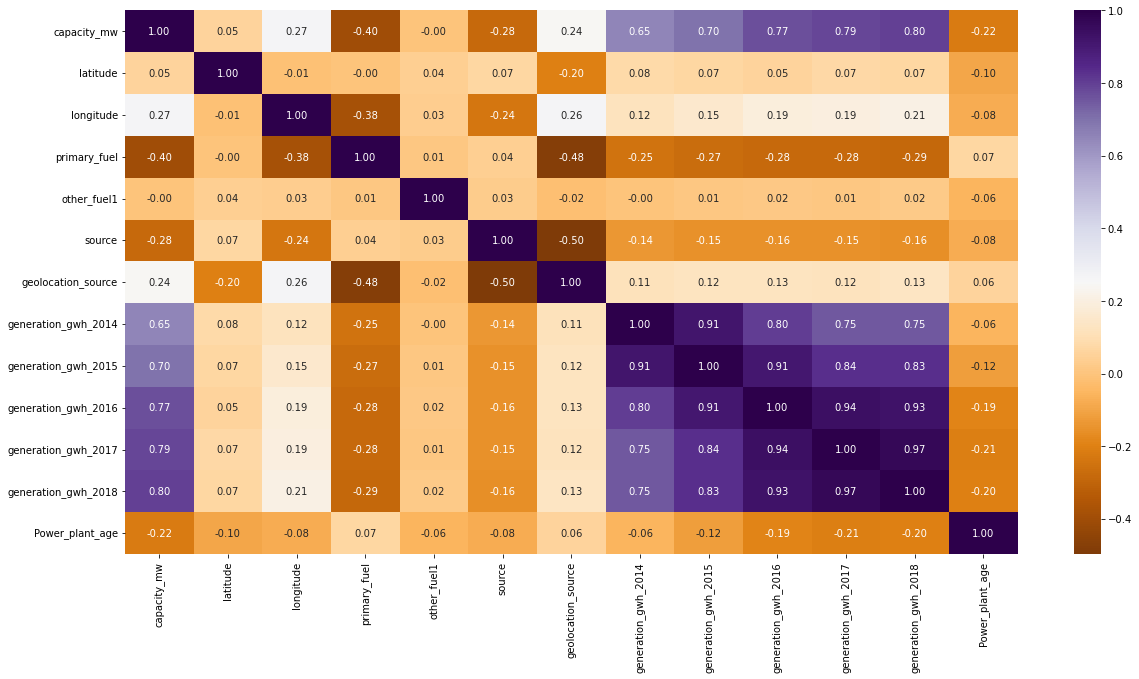

In [73]:
#Plotting the Heatmap of Correlation

corr = df_new.corr()
plt.figure(figsize=(20,10), facecolor='white')
sns.heatmap(corr, annot=True,cmap='PuOr',fmt='.2f')
plt.show()

**OBSERVATIONS:**

* As I mentioned earlier, We have Multicollinearity between features.
* Our target primary_fuel has highest correlation with capacity_mw followed by geolocation_source.
* Least correlation is with other_fuel1 and source.
* generation_gwh_2017 and 2018 are highly correlated.
* All the columns which holds the data of Electricity generation in each year are higly correlated with each other.

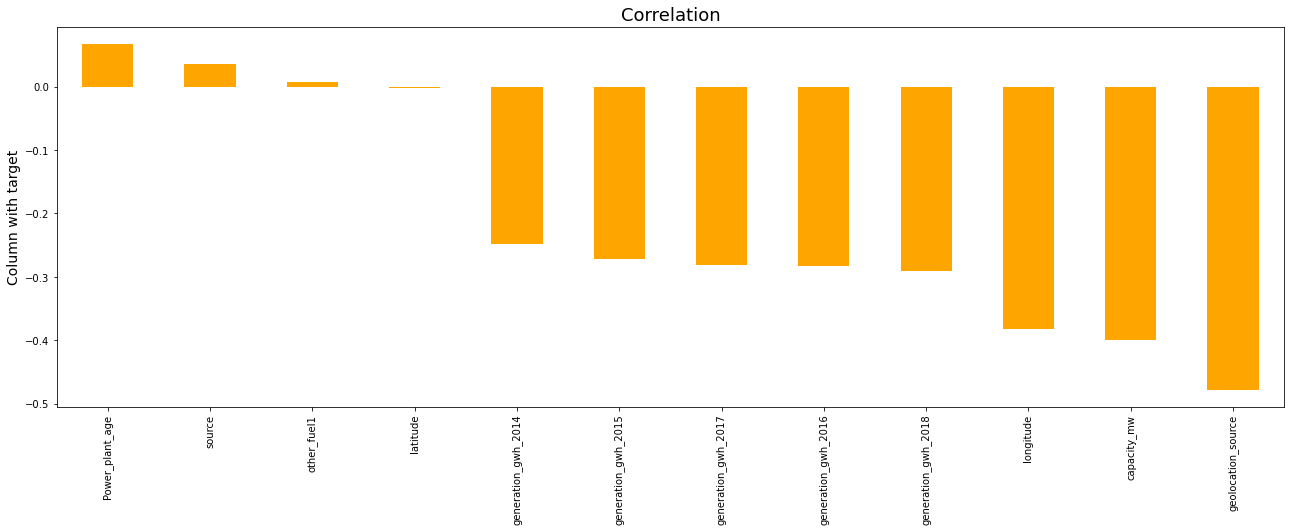

In [74]:
#Visualization of the Correlation Metrics

plt.figure(figsize=(22,7))
df_new.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='Orange')
plt.ylabel("Column with target",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

* Capacity_mw, geolocation source and longitude are highly correlated with primary_fuel.
* Least correlation is with other_fuel1, latitude and source.
* Almost all columns are negatively correlated with target except for power plant age and 3 other least correlated variables.

In [75]:
#dropping the variables latitude and other_fuel1

df_new = df_new.drop(["other_fuel1"],axis=1)
df_new = df_new.drop(["latitude"],axis=1)

### 4.4 Data Preprocessing

In [76]:
#primary_fuel as our target variable

x = df_new.drop("primary_fuel",axis=1)
y = df_new["primary_fuel"]

In [77]:
x.shape

(846, 10)

In [78]:
y.shape

(846,)

In [79]:
y.value_counts()

1.0    233
3.0    220
6.0    126
7.0    123
2.0     65
0.0     50
5.0     20
4.0      9
Name: primary_fuel, dtype: int64

**We have Imbalanced data. I am using SMOTE technique to balance the data**

### 4.5 Skewness

In [80]:
df_new.skew()

capacity_mw            1.992633
longitude              0.948983
primary_fuel           0.404222
source                 1.724898
geolocation_source    -2.056692
generation_gwh_2014    2.961146
generation_gwh_2015    2.760332
generation_gwh_2016    2.699308
generation_gwh_2017    2.598081
generation_gwh_2018    2.663498
Power_plant_age        1.288240
dtype: float64

In [81]:
#Removing the Skewness

skew_cols=["capacity_mw",'longitude','generation_gwh_2014','generation_gwh_2015',
           'generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df_new[skew_cols] = scaler.fit_transform(df_new[skew_cols].values)

In [82]:
#Checking the skewness again

df_new[skew_cols].skew()

capacity_mw            0.015186
longitude              0.000318
generation_gwh_2014    0.234988
generation_gwh_2015    0.168580
generation_gwh_2016    0.154255
generation_gwh_2017    0.131308
generation_gwh_2018    0.137478
Power_plant_age        0.040771
dtype: float64

**Skewness is completely removed from the data**

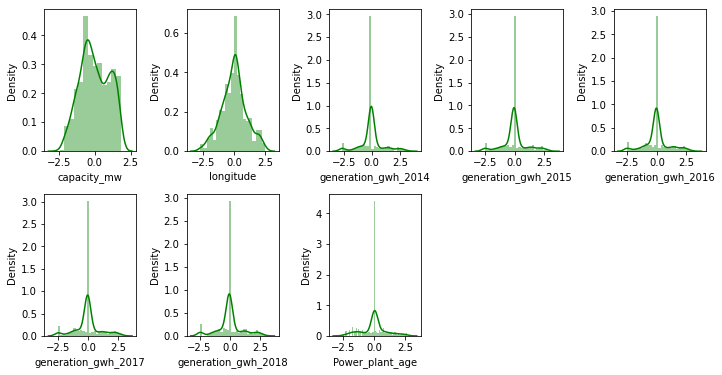

In [83]:
plt.figure(figsize=(10,10))
graph=1 

for column in df_new[skew_cols]:

    plt.subplot(4,5,graph)

    sns.distplot(df_new[column],color='green')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()

**Our data is clean from skewness now**

### 4.6 Standardization

In [84]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [85]:
x.head()

capacity_mw  longitude    source  geolocation_source  generation_gwh_2014  \
0    -0.628362  -0.875597  1.391906           -1.031579            -0.274829   
1    -0.400491  -0.557795  2.812646            0.408546            -0.274829   
2    -0.540793  -1.773865 -0.531557            0.408546            -0.274829   
3    -0.312205   3.332850 -0.509699            0.408546            -0.398047   
4     3.660634   1.253862 -0.509699            0.408546             1.226920   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0            -0.301614            -0.306339            -0.298643   
1            -0.301614            -0.306339            -0.298643   
2            -0.301614            -0.306339            -0.298643   
3            -0.215337            -0.213206            -0.392440   
4             3.086059             3.139707             2.479704   

   generation_gwh_2018  Power_plant_age  
0            -0.315789        -1.017502  
1            -0.315789        -0.117077  
2            -0.315789        -0.117077  
3            -0.389186        -0.387204  
4             3.504514        -1.377672

### 4.7 Multicollinearity

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [87]:
vif_calc()

   VIF Factor             features
0    3.222106          capacity_mw
1    1.148507            longitude
2    1.417218               source
3    1.391179   geolocation_source
4    6.562183  generation_gwh_2014
5   13.270671  generation_gwh_2015
6   15.471475  generation_gwh_2016
7   19.832222  generation_gwh_2017
8   18.010832  generation_gwh_2018
9    1.120766      Power_plant_age


**Since all the columns are important I cannot remove the variable.** PCA technique not working for this dataste.

### 4.8 SMOTE Analysis

In [88]:
#Importing SMOTE and using it to balance

from imblearn.over_sampling import SMOTE

smt = SMOTE()
x,y = smt.fit_resample(x,y)

6.0    233
1.0    233
7.0    233
2.0    233
3.0    233
0.0    233
5.0    233
4.0    233
Name: primary_fuel, dtype: int64


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

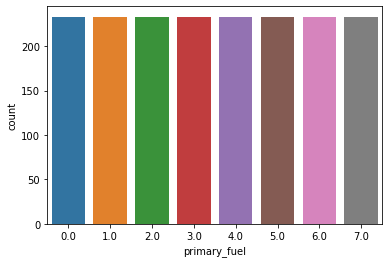

In [89]:
#Checking the count of primary_fuel

print(y.value_counts())
sns.countplot(y)

# 5- Building Model

## 5.1 Primary_fuel as Target (Classification Problem)

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score, confusion_matrix,precision_score, f1_score, accuracy_score, classification_report

### 5.1.1 Logistic Regression

In [91]:
#Finding the Best Random State

Accu=0
RS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.7339285714285714  on Random_state  187


In [92]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

In [93]:
lr=LogisticRegression()

lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_lr=lr.predict(x_test)
print('Accuracy score of Logistic Regression is:')
print(accuracy_score(y_test,pred_lr))
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

Accuracy score of Logistic Regression is:
0.7339285714285714
[[69  0  0  0  0  1  0  8]
 [11 21  9  2  5  4  0  4]
 [ 5  6 35  9  3  9  0  3]
 [ 0  8  8 26  3 11  0 13]
 [ 0  0  1  4 64  0  0  0]
 [12  0  2  0  0 62  0  5]
 [ 2  0  0  0  0  0 71  0]
 [ 0  0  0  1  0  0  0 63]]
              precision    recall  f1-score   support

         0.0       0.70      0.88      0.78        78
         1.0       0.60      0.38      0.46        56
         2.0       0.64      0.50      0.56        70
         3.0       0.62      0.38      0.47        69
         4.0       0.85      0.93      0.89        69
         5.0       0.71      0.77      0.74        81
         6.0       1.00      0.97      0.99        73
         7.0       0.66      0.98      0.79        64

    accuracy                           0.73       560
   macro avg       0.72      0.72      0.71       560
weighted avg       0.73      0.73      0.72       560



In [94]:
#HyperParameter Tuning of LR

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

lr_grid_param={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'penalty':['none', 'elasticnet', 'l1', 'l2'],
               'C':[0.001, 0.01, 0.1, 1, 10, 100]}

gd_sr=GridSearchCV(estimator=lr,param_grid=lr_grid_param,scoring='accuracy',cv=5,verbose=0)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'C': 0.001, 'penalty': 'none', 'solver': 'lbfgs'}
0.7317622301017612


In [95]:
#Reinstating the tuned parameters:


lr=LogisticRegression(C=0.001,solver='lbfgs',penalty='none')

lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print('Accuracy score of Logistic Regression is:')
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy score of Logistic Regression is:
0.75
[[74  0  0  0  0  1  0  3]
 [ 9 20 10  2  5  4  0  6]
 [ 1  7 34 11  3 13  0  1]
 [ 0  8  9 28  3  9  0 12]
 [ 0  0  0  4 65  0  0  0]
 [ 8  0  4  0  0 65  0  4]
 [ 0  0  0  0  0  0 73  0]
 [ 0  0  0  2  0  1  0 61]]
              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87        78
         1.0       0.57      0.36      0.44        56
         2.0       0.60      0.49      0.54        70
         3.0       0.60      0.41      0.48        69
         4.0       0.86      0.94      0.90        69
         5.0       0.70      0.80      0.75        81
         6.0       1.00      1.00      1.00        73
         7.0       0.70      0.95      0.81        64

    accuracy                           0.75       560
   macro avg       0.73      0.74      0.72       560
weighted avg       0.73      0.75      0.73       560



We could increase the accuracy by 2%

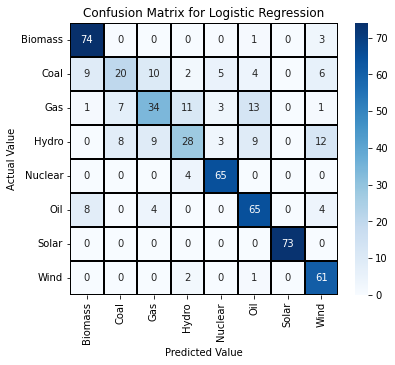

In [96]:
#Plotting the confusion Matrix,took predicted values from model with hyperparameter tuning

cm = confusion_matrix(y_test, predlr)

x_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### 5.1.2 Decision Tree Classifier

In [97]:
#Finding the best Randomstate:

Accu=0
RS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    pred = dt.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8946428571428572  on Random_state  116


In [98]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

In [99]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

0.8678571428571429
[[72  1  0  0  0  0  0  0]
 [ 4 47  8  7  5  2  0  0]
 [ 0  5 47  3  3  5  0  1]
 [ 0  4  6 64  2  2  0  0]
 [ 0  2  0  3 60  2  0  0]
 [ 0  3  4  0  0 66  0  1]
 [ 1  0  0  0  0  0 65  0]
 [ 0  0  0  0  0  0  0 65]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        73
         1.0       0.76      0.64      0.70        73
         2.0       0.72      0.73      0.73        64
         3.0       0.83      0.82      0.83        78
         4.0       0.86      0.90      0.88        67
         5.0       0.86      0.89      0.87        74
         6.0       1.00      0.98      0.99        66
         7.0       0.97      1.00      0.98        65

    accuracy                           0.87       560
   macro avg       0.87      0.87      0.87       560
weighted avg       0.87      0.87      0.87       560



In [100]:
#HyperParameter Tuning for DTC

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

dtc= DecisionTreeClassifier()
dt_grid_param={'criterion':['gini','entropy'],
             'max_depth':np.arange(0,50),
             'max_features':["auto","sqrt","log2"],
             'max_leaf_nodes':[10,20,30],'min_samples_leaf': [5, 10, 20, 50, 100]}

gd_sr=GridSearchCV(estimator=dtc,param_grid=dt_grid_param,scoring='accuracy',cv=5,verbose=0)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(gd_sr)
print(gd_sr.best_score_)
print(gd_sr.best_estimator_)
print(gd_sr.best_params_)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy')
0.7923751044999856
DecisionTreeClassifier(max_depth=40, max_features='log2', max_leaf_nodes=30,
                       min_samples_leaf=5)
{'criterion': 'gini', 'max_depth': 40, 'max_features': 'log2', 'max_leaf_nodes': 30, 'min_samples_leaf': 5}


In [101]:
#Reinstating the tuned parameters:

dtc=DecisionTreeClassifier(criterion='gini',max_depth=40,max_features='log2',
                           max_leaf_nodes=30, min_samples_leaf=5)
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7464285714285714
[[73  0  0  0  0  0  0  0]
 [ 7 32 11  1 18  4  0  0]
 [ 2  4 48  0  5  5  0  0]
 [ 2  3 39 17  4 11  2  0]
 [ 0  2  5  3 56  1  0  0]
 [ 0  0  9  0  0 65  0  0]
 [ 3  0  0  0  0  1 62  0]
 [ 0  0  0  0  0  0  0 65]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91        73
         1.0       0.78      0.44      0.56        73
         2.0       0.43      0.75      0.55        64
         3.0       0.81      0.22      0.34        78
         4.0       0.67      0.84      0.75        67
         5.0       0.75      0.88      0.81        74
         6.0       0.97      0.94      0.95        66
         7.0       1.00      1.00      1.00        65

    accuracy                           0.75       560
   macro avg       0.78      0.76      0.73       560
weighted avg       0.78      0.75      0.73       560



**No Improvement in score. so ignoring it.**

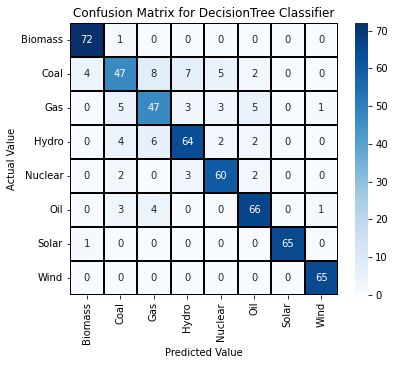

In [102]:
#Plotting the confusion Matrix,took predicted values from model without hyperparameter tuning

cm = confusion_matrix(y_test, pred_dtc)

x_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for DecisionTree Classifier')
plt.show()

### 5.1.3 Support Vector Classifier

In [103]:
#Finding the best random state:

Accu=0
RS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    sv=SVC()
    sv.fit(x_train, y_train)
    pred = sv.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8017857142857143  on Random_state  124


In [104]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

In [105]:
#Calling each kernel by defining svmkernel:

def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [106]:
svmkernel('linear')

0.7892857142857143
[[72  0  0  0  0  2  0  0]
 [12 34 12  4  9  2  0  3]
 [ 3  7 36 12  1  5  0  6]
 [ 0  5  9 40  6  5  0  4]
 [ 0  0  0  3 67  0  0  0]
 [ 0  0  2  1  0 62  0  2]
 [ 0  2  0  0  0  0 67  0]
 [ 0  0  0  1  0  0  0 64]]
              precision    recall  f1-score   support

         0.0       0.83      0.97      0.89        74
         1.0       0.71      0.45      0.55        76
         2.0       0.61      0.51      0.56        70
         3.0       0.66      0.58      0.62        69
         4.0       0.81      0.96      0.88        70
         5.0       0.82      0.93      0.87        67
         6.0       1.00      0.97      0.99        69
         7.0       0.81      0.98      0.89        65

    accuracy                           0.79       560
   macro avg       0.78      0.79      0.78       560
weighted avg       0.78      0.79      0.78       560



In [107]:
svmkernel('poly')

0.6535714285714286
[[51  0  0  0  0  0  0 23]
 [ 5 28 11  3  3  1  0 25]
 [ 3  0 29  0  1 10  0 27]
 [ 0  4  7 25  2  7  0 24]
 [ 0  4  7  6 50  0  0  3]
 [ 3  0  1  1  0 52  0 10]
 [ 3  0  0  0  0  0 66  0]
 [ 0  0  0  0  0  0  0 65]]
              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73        74
         1.0       0.78      0.37      0.50        76
         2.0       0.53      0.41      0.46        70
         3.0       0.71      0.36      0.48        69
         4.0       0.89      0.71      0.79        70
         5.0       0.74      0.78      0.76        67
         6.0       1.00      0.96      0.98        69
         7.0       0.37      1.00      0.54        65

    accuracy                           0.65       560
   macro avg       0.73      0.66      0.66       560
weighted avg       0.73      0.65      0.65       560



In [108]:
svmkernel('rbf')

0.8017857142857143
[[70  0  0  0  0  0  0  4]
 [11 40  5  4  8  3  0  5]
 [ 3  2 45  3  4  6  0  7]
 [ 0  4  6 34  7  5  0 13]
 [ 0  0  0  3 67  0  0  0]
 [ 0  0  2  1  0 61  0  3]
 [ 2  0  0  0  0  0 67  0]
 [ 0  0  0  0  0  0  0 65]]
              precision    recall  f1-score   support

         0.0       0.81      0.95      0.88        74
         1.0       0.87      0.53      0.66        76
         2.0       0.78      0.64      0.70        70
         3.0       0.76      0.49      0.60        69
         4.0       0.78      0.96      0.86        70
         5.0       0.81      0.91      0.86        67
         6.0       1.00      0.97      0.99        69
         7.0       0.67      1.00      0.80        65

    accuracy                           0.80       560
   macro avg       0.81      0.81      0.79       560
weighted avg       0.81      0.80      0.79       560



In [109]:
#Hyperparameter tuning of SVC for better accuracy:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

sv=SVC()
sv_grid_param={'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}

gd_sr=GridSearchCV(estimator=sv,param_grid=sv_grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
0.899149586324195


In [112]:
#Reinstating the tuned parameters:

svc=SVC(kernel='rbf',C=1000,gamma=1)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
pred_svc=svc.predict(x_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.8875
[[74  0  0  0  0  0  0  0]
 [ 7 59  2  3  2  3  0  0]
 [ 1  7 56  3  0  3  0  0]
 [ 2 15  2 47  0  3  0  0]
 [ 0  6  0  0 64  0  0  0]
 [ 0  0  2  1  0 64  0  0]
 [ 0  0  0  0  0  0 69  0]
 [ 0  0  0  0  0  1  0 64]]
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94        74
         1.0       0.68      0.78      0.72        76
         2.0       0.90      0.80      0.85        70
         3.0       0.87      0.68      0.76        69
         4.0       0.97      0.91      0.94        70
         5.0       0.86      0.96      0.91        67
         6.0       1.00      1.00      1.00        69
         7.0       1.00      0.98      0.99        65

    accuracy                           0.89       560
   macro avg       0.90      0.89      0.89       560
weighted avg       0.89      0.89      0.89       560



**Our model Accuracy increased very well**

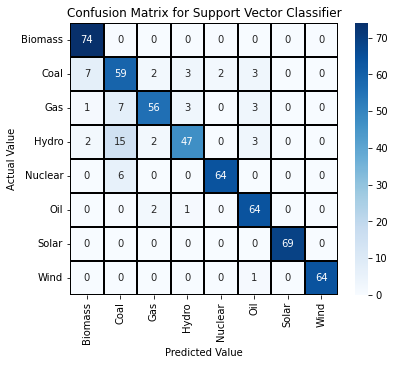

In [113]:
#Plotting the confusion Matrix

cm = confusion_matrix(y_test, pred_svc)

x_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

### 5.1.4 Random Forest Classifier

In [114]:
#Finding the best random state

Accu=0
RS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.9321428571428572  on Random_state  128


In [115]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

In [116]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9303571428571429
[[71  0  0  0  0  0  0  0]
 [ 4 54  3  6  5  2  0  0]
 [ 0  3 56  1  1  0  0  0]
 [ 0  2  6 57  1  3  0  0]
 [ 0  0  0  1 64  0  0  0]
 [ 0  0  1  0  0 71  0  0]
 [ 0  0  0  0  0  0 73  0]
 [ 0  0  0  0  0  0  0 75]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        71
         1.0       0.92      0.73      0.81        74
         2.0       0.85      0.92      0.88        61
         3.0       0.88      0.83      0.85        69
         4.0       0.90      0.98      0.94        65
         5.0       0.93      0.99      0.96        72
         6.0       1.00      1.00      1.00        73
         7.0       1.00      1.00      1.00        75

    accuracy                           0.93       560
   macro avg       0.93      0.93      0.93       560
weighted avg       0.93      0.93      0.93       560



In [119]:
#Hyper Parameter Tuning for Random Forest

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

rf=RandomForestClassifier()
rf_grid_param={"max_features": [1,3,10],
                "min_samples_split":[2,3,5,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[200,300],
                "criterion":["gini",'entropy']}

gd_sr=GridSearchCV(estimator=rf,param_grid=rf_grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'bootstrap': False, 'criterion': 'entropy', 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}
0.9173830320850989


In [122]:
#Reinstating the tuned parameters:

rf=RandomForestClassifier(n_estimators=300,bootstrap=False,criterion='entropy',
                         max_features=3,min_samples_leaf=1,min_samples_split=3)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9303571428571429
[[71  0  0  0  0  0  0  0]
 [ 4 54  2  7  4  3  0  0]
 [ 0  3 56  2  0  0  0  0]
 [ 0  4  4 58  0  3  0  0]
 [ 0  0  0  1 64  0  0  0]
 [ 1  0  1  0  0 70  0  0]
 [ 0  0  0  0  0  0 73  0]
 [ 0  0  0  0  0  0  0 75]]
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        71
         1.0       0.89      0.73      0.80        74
         2.0       0.89      0.92      0.90        61
         3.0       0.85      0.84      0.85        69
         4.0       0.94      0.98      0.96        65
         5.0       0.92      0.97      0.95        72
         6.0       1.00      1.00      1.00        73
         7.0       1.00      1.00      1.00        75

    accuracy                           0.93       560
   macro avg       0.93      0.93      0.93       560
weighted avg       0.93      0.93      0.93       560



No change in accuracy

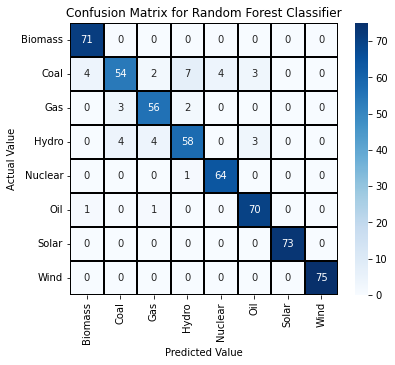

In [123]:
#Plotting the confusion Matrix

cm = confusion_matrix(y_test, predrf)

x_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

### 5.1.5 KNN Classifier

In [124]:
#Finding the best random state:

Accu=0
RS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8767857142857143  on Random_state  15


In [125]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

In [126]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8767857142857143
[[72  2  0  0  0  0  0  1]
 [ 5 31  3  3  7  0  0  5]
 [ 2  2 57  4  2  6  0  3]
 [ 0  6 11 48  2  2  0  0]
 [ 0  0  0  0 70  0  0  0]
 [ 3  0  0  0  0 58  0  0]
 [ 0  0  0  0  0  0 80  0]
 [ 0  0  0  0  0  0  0 75]]
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92        75
         1.0       0.76      0.57      0.65        54
         2.0       0.80      0.75      0.78        76
         3.0       0.87      0.70      0.77        69
         4.0       0.86      1.00      0.93        70
         5.0       0.88      0.95      0.91        61
         6.0       1.00      1.00      1.00        80
         7.0       0.89      1.00      0.94        75

    accuracy                           0.88       560
   macro avg       0.87      0.87      0.86       560
weighted avg       0.87      0.88      0.87       560



In [127]:
#HyperParameter Tuning of knn:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

knn=KNeighborsClassifier()
knn_grid_param={"n_neighbors": np.arange(1, 31, 2),
                "weights": ["uniform","distance"],
                'metric' : ['minkowski','euclidean','manhattan'],
                'algorithm':['auto','ball_tree','kd_tree','brute']}

gd_sr=GridSearchCV(estimator=knn,param_grid=knn_grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
0.8927138285911962


In [132]:
#Reinstating the tuned parameters

knn=KNeighborsClassifier(n_neighbors=1,metric='manhattan',weights='uniform',algorithm='auto')
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8928571428571429
[[70  4  0  0  0  0  0  1]
 [ 4 32  3  6  5  1  0  3]
 [ 1  2 64  3  2  2  0  2]
 [ 0  6  5 51  5  2  0  0]
 [ 0  1  0  0 69  0  0  0]
 [ 1  0  0  1  0 59  0  0]
 [ 0  0  0  0  0  0 80  0]
 [ 0  0  0  0  0  0  0 75]]
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93        75
         1.0       0.71      0.59      0.65        54
         2.0       0.89      0.84      0.86        76
         3.0       0.84      0.74      0.78        69
         4.0       0.85      0.99      0.91        70
         5.0       0.92      0.97      0.94        61
         6.0       1.00      1.00      1.00        80
         7.0       0.93      1.00      0.96        75

    accuracy                           0.89       560
   macro avg       0.88      0.88      0.88       560
weighted avg       0.89      0.89      0.89       560



**Our accuracy is improved**

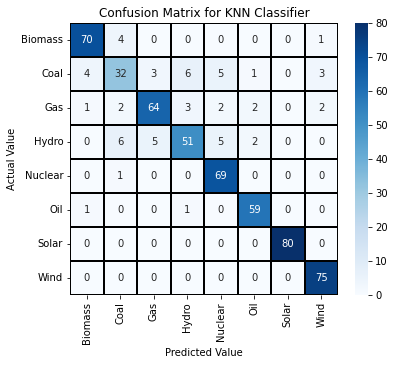

In [133]:
#Plotting the confusion Matrix

cm = confusion_matrix(y_test, predknn)

x_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

### 5.1.6 Gradient Boosting Classifier

In [134]:
from sklearn.ensemble import GradientBoostingClassifier

GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
predgb=GBC.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, predgb))
print('Confusion Matrix:',confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

Accuracy Score: 0.9196428571428571
Confusion Matrix: [[71  3  0  0  0  1  0  0]
 [ 4 41  3  1  5  0  0  0]
 [ 1  7 59  3  2  3  0  1]
 [ 0  2  4 62  1  0  0  0]
 [ 0  0  0  1 69  0  0  0]
 [ 1  0  0  2  0 58  0  0]
 [ 0  0  0  0  0  0 80  0]
 [ 0  0  0  0  0  0  0 75]]
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93        75
         1.0       0.77      0.76      0.77        54
         2.0       0.89      0.78      0.83        76
         3.0       0.90      0.90      0.90        69
         4.0       0.90      0.99      0.94        70
         5.0       0.94      0.95      0.94        61
         6.0       1.00      1.00      1.00        80
         7.0       0.99      1.00      0.99        75

    accuracy                           0.92       560
   macro avg       0.91      0.91      0.91       560
weighted avg       0.92      0.92      0.92       560



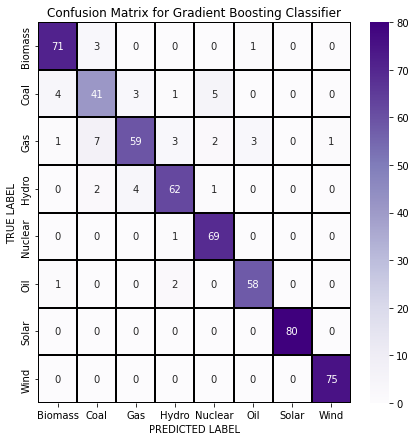

In [135]:
cm = confusion_matrix(y_test, predgb)

x_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

## Cross_Validation_Score

In [136]:
score=cross_val_score(lr,x,y,cv=5)
score_a=score.mean()
print("Cross_Val_Score of LR:",score_a)

Cross_Val_Score of LR: 0.7317622301017612


In [137]:
score=cross_val_score(dtc,x,y,cv=5)
score_b=score.mean()
print("Cross_Val_Score of DTC:",score_b)

Cross_Val_Score of DTC: 0.7703998385655394


In [138]:
score=cross_val_score(svc,x,y,cv=5)
score_c=score.mean()
print("Cross_Val_Score of SVC:",score_c)

Cross_Val_Score of SVC: 0.899149586324195


In [139]:
score=cross_val_score(rf,x,y,cv=5)
score_d=score.mean()
print("Cross_Val_Score of RF:",score_d)

Cross_Val_Score of RF: 0.9136282394995533


In [140]:
score=cross_val_score(knn,x,y,cv=5)
score_e=score.mean()
print("Cross_Val_Score of KNN:",score_e)

Cross_Val_Score of KNN: 0.8927138285911962


In [141]:
score=cross_val_score(GBC,x,y,cv=5)
score_f=score.mean()
print("Cross_Val_Score of Gradient Boosting:",score_f)

Cross_Val_Score of Gradient Boosting: 0.899678572458128


Text(0.5, 1.0, 'Cross Validation Scores')

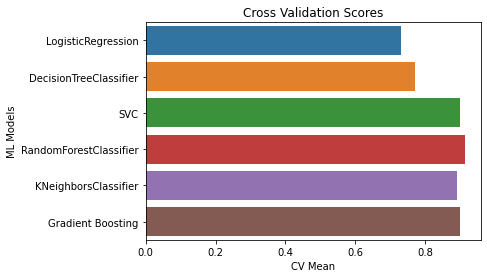

In [142]:
cv_result=[score_a,score_b,score_c,score_d,score_e,score_f]
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":[ "LogisticRegression",
            "DecisionTreeClassifier", "SVC","RandomForestClassifier","KNeighborsClassifier",
            "Gradient Boosting"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("CV Mean")
g.set_title("Cross Validation Scores")

**We have Random Forest Model with highest Cross validation score of 91.36%**

Text(0.5, 1.0, 'Accuracy scores of different Models')

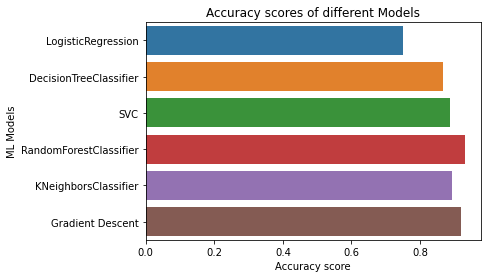

In [143]:
score_lr=0.75
score_dtc=0.8678571428571429
score_svc=0.8875
score_rf=0.9303571428571429
score_knn=0.8928571428571429
score_gbc=0.9196428571428571

acc_result=[score_lr,score_dtc,score_svc,score_rf,score_knn,score_gbc]
acc_results = pd.DataFrame({"Accuracy Scores":acc_result, "ML Models":[ "LogisticRegression",
            "DecisionTreeClassifier", "SVC","RandomForestClassifier","KNeighborsClassifier",
            "Gradient Descent"]})

g = sns.barplot("Accuracy Scores", "ML Models", data = acc_results)
g.set_xlabel("Accuracy score")
g.set_title("Accuracy scores of different Models")

**Accuracy of Random forest is the highest with 93.03%**

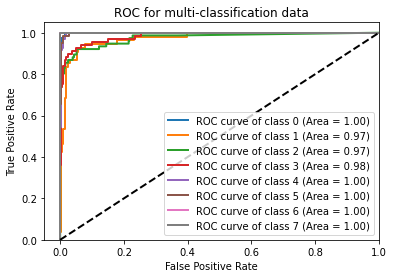

In [144]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

classifier = OneVsRestClassifier(rf)
y_sco = classifier.fit(x_train, y_train).predict_proba(x_test)

y_test_bin  = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

false_pr = dict()
true_pr = dict()
roc_auc = dict()
for i in range(n_classes):
    false_pr[i], true_pr[i], _ = roc_curve(y_test_bin[:, i], y_sco[:, i])
    roc_auc[i] = auc(false_pr[i], true_pr[i])
   
for i in range(n_classes):
    plt.plot(false_pr[i], true_pr[i], lw=2,
             label='ROC curve of class {0} (Area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-classification data')
plt.legend(loc="lower right")
plt.show()

## From above 3 plots, We take Random Forest as our Final Model

In [145]:
#best parameters:{'bootstrap': False, 'criterion': 'entropy', 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}


Final_Model=RandomForestClassifier(n_estimators=100,bootstrap=False,criterion='entropy',
                         max_features=3,min_samples_leaf=1,min_samples_split=3)
Final_Model.fit(x_train,y_train)
predrf=Final_Model.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9339285714285714
[[73  2  0  0  0  0  0  0]
 [ 1 42  3  4  4  0  0  0]
 [ 1  4 64  3  1  3  0  0]
 [ 0  3  4 60  2  0  0  0]
 [ 0  0  0  1 69  0  0  0]
 [ 0  0  0  1  0 60  0  0]
 [ 0  0  0  0  0  0 80  0]
 [ 0  0  0  0  0  0  0 75]]
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        75
         1.0       0.82      0.78      0.80        54
         2.0       0.90      0.84      0.87        76
         3.0       0.87      0.87      0.87        69
         4.0       0.91      0.99      0.95        70
         5.0       0.95      0.98      0.97        61
         6.0       1.00      1.00      1.00        80
         7.0       1.00      1.00      1.00        75

    accuracy                           0.93       560
   macro avg       0.93      0.93      0.93       560
weighted avg       0.93      0.93      0.93       560



## Saving the Model

In [146]:
import joblib
joblib.dump(Final_Model,'Global_Power_plant_RF.pkl')

['Global_Power_plant_RF.pkl']

<AxesSubplot:>

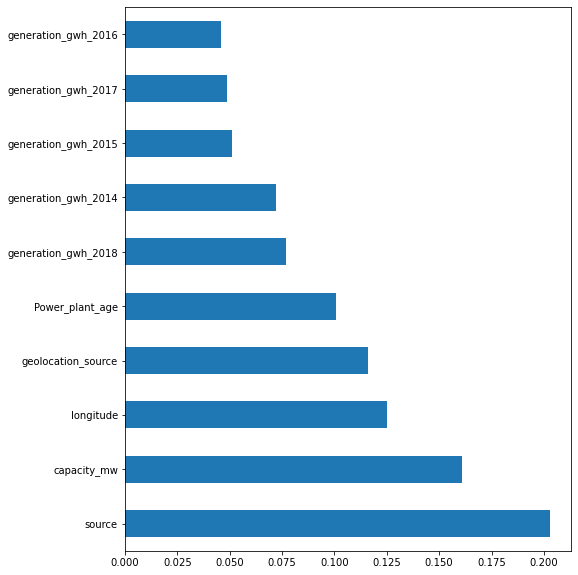

In [147]:
#Checking Feature Importance with Random Forest Model

feat_importances = pd.Series(Final_Model.feature_importances_, index=x.columns)
feat_importances.nlargest(100).plot(kind='barh',figsize=(8,10))

### source, capacity and longitude are the important feature determining primary_fuel

## Predictions

In [148]:
# Loading the saved model
model=joblib.load("Global_Power_plant_RF.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([7., 4., 0., 7., 4., 7., 1., 7., 6., 3., 7., 1., 4., 2., 6., 6., 2.,
       2., 2., 3., 6., 4., 3., 3., 0., 7., 5., 6., 0., 7., 1., 4., 0., 3.,
       6., 5., 0., 3., 2., 4., 0., 0., 3., 2., 6., 0., 3., 6., 6., 6., 7.,
       1., 6., 5., 2., 7., 0., 0., 4., 2., 4., 6., 7., 6., 1., 2., 5., 2.,
       1., 6., 3., 4., 2., 5., 5., 3., 6., 3., 7., 6., 7., 0., 4., 4., 2.,
       6., 4., 5., 4., 3., 6., 5., 7., 3., 1., 0., 7., 5., 7., 3., 7., 5.,
       0., 4., 5., 6., 4., 4., 4., 4., 5., 3., 0., 5., 1., 5., 2., 4., 0.,
       0., 7., 3., 6., 4., 3., 7., 7., 1., 4., 1., 5., 3., 4., 2., 0., 3.,
       4., 6., 7., 3., 4., 2., 6., 3., 7., 4., 0., 3., 7., 2., 1., 4., 0.,
       6., 2., 2., 7., 0., 2., 7., 3., 0., 5., 2., 6., 3., 3., 7., 7., 6.,
       1., 7., 6., 0., 3., 6., 3., 7., 1., 5., 5., 0., 5., 0., 2., 2., 6.,
       2., 4., 4., 7., 6., 0., 7., 5., 2., 3., 6., 6., 6., 1., 0., 1., 5.,
       2., 6., 0., 5., 0., 4., 5., 4., 4., 6., 5., 4., 6., 5., 3., 1., 4.,
       1., 1., 7., 2., 2.

In [149]:
base = pd.DataFrame()
base["actual"] = y_test
base["predictions"] = prediction

In [150]:
base

actual  predictions
1783     7.0          7.0
1262     4.0          4.0
893      0.0          0.0
1860     7.0          7.0
1353     4.0          4.0
...      ...          ...
570      6.0          6.0
865      0.0          0.0
1307     4.0          4.0
704      6.0          6.0
617      6.0          6.0

[560 rows x 2 columns]

## We get almost equal values for all

## 5.2 Prediction of Capacity_mw(Regression Problem)

### a) Outliers removal

In [151]:
df.head()

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0          2.5   28.1839    73.2407        Solar         Oil   
1         98.0   24.7663    74.6090         Coal         Oil   
2         39.2   21.9038    69.3732         Wind         Oil   
3        135.0   23.8712    91.3602          Gas         Oil   
4       1800.0   21.9603    82.4091         Coal         Oil   

                                 source                    geolocation_source  \
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd                                   WRI   
2                                   CDM                                   WRI   
3         Central Electricity Authority                                   WRI   
4         Central Electricity Authority                                   WRI   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0           801.123775           711.181225           737.205450   
1           801.123775           711.181225           737.205450   
2           801.123775           711.181225           737.205450   
3           617.789264           843.747000           886.004428   
4          3035.550000          5916.370000          6243.000000   

   generation_gwh_2017  generation_gwh_2018  Power_plant_age  
0           817.977250           751.644375              8.0  
1           817.977250           751.644375             18.0  
2           817.977250           751.644375             18.0  
3           663.774500           626.239128             15.0  
4          5385.579736          7279.000000              4.0

### since we removed Outliers from capacity before we will restart the analysis from here

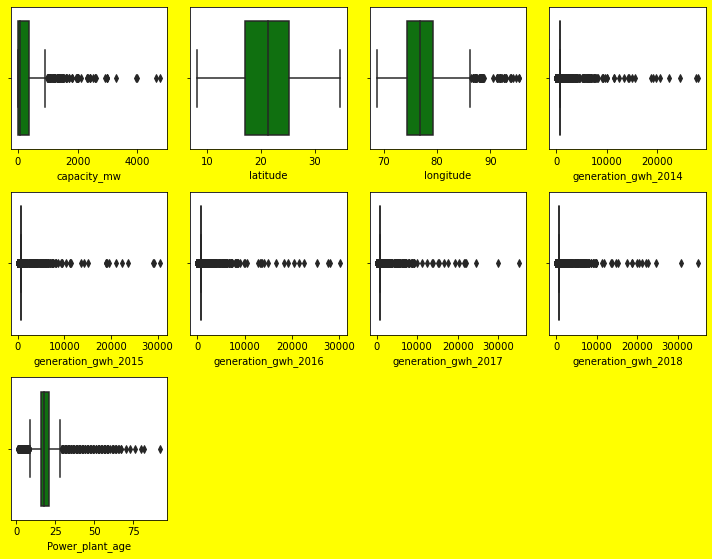

In [152]:
plt.figure(figsize=(10,10),facecolor='yellow')
graph=1 

for column in num_cols:

    plt.subplot(4,4,graph)

    sns.boxplot(df[column],color='green',orient='h')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()

In [153]:
#removing capacity from the columns

out_cols= df[['longitude', 'generation_gwh_2014', 
           'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 
           'generation_gwh_2018', 'Power_plant_age']]

from scipy.stats import zscore

z=np.abs(zscore(out_cols))
df_new=df[(z<3).all(axis=1)]
df_new

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0            2.5   28.1839    73.2407        Solar         Oil   
1           98.0   24.7663    74.6090         Coal         Oil   
2           39.2   21.9038    69.3732         Wind         Oil   
3          135.0   23.8712    91.3602          Gas         Oil   
4         1800.0   21.9603    82.4091         Coal         Oil   
..           ...       ...        ...          ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil   
903          3.0   12.8932    78.1654        Solar         Oil   
904         25.5   15.2758    75.5811         Wind         Oil   
905         80.0   24.3500    73.7477         Coal         Oil   
906         16.5    9.9344    77.4768         Wind         Oil   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                       geolocation_source  generation_gwh_2014  \
0    National Renewable Energy Laboratory           801.123775   
1                                     WRI           801.123775   
2                                     WRI           801.123775   
3                                     WRI           617.789264   
4                                     WRI          3035.550000   
..                                    ...                  ...   
902                                   WRI           801.123775   
903                        Industry About           801.123775   
904                                   WRI           801.123775   
905                                   WRI           801.123775   
906                                   WRI           801.123775   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0             711.181225           737.205450           817.977250   
1             711.181225           737.205450           817.977250   
2             711.181225           737.205450           817.977250   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903           711.181225           737.205450           817.977250   
904           711.181225           737.205450           817.977250   
905           711.181225           737.205450           817.977250   
906           711.181225           737.205450           817.977250   

     generation_gwh_2018  Power_plant_age  
0             751.644375              8.0  
1             751.644375             18.0  
2             751.644375             18.0  
3             626.239128             15.0  
4            7279.000000              4.0  
..                   ...              ...  
902           686.500000              3.0  
903           751.644375             18.0  
904           751.644375             18.0  
905           751.644375             18.0  
906           751.644375             18.0  

[851 rows x 13 columns]

In [154]:
print('old data shape:',df.shape)
print('new data shape:',df_new.shape)

old data shape: (907, 13)
new data shape: (851, 13)


In [155]:
#checking the loss percentage

loss_percentage=(((907-851)/907)*100)
loss_percentage

6.174200661521499

dataloss is below 10%

### b) Encoding

In [156]:
cat_cols=["primary_fuel","other_fuel1","source","geolocation_source"]

#Encoding the categorical columns:

from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in cat_cols:
    df_new[i]=enc.fit_transform(df_new[i].values.reshape(-1,1))

In [157]:
df_new.head()

capacity_mw  latitude  longitude  primary_fuel  other_fuel1  source  \
0          2.5   28.1839    73.2407           6.0          2.0   109.0   
1         98.0   24.7663    74.6090           1.0          2.0   174.0   
2         39.2   21.9038    69.3732           7.0          2.0    21.0   
3        135.0   23.8712    91.3602           2.0          2.0    22.0   
4       1800.0   21.9603    82.4091           1.0          2.0    22.0   

   geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0                 1.0           801.123775           711.181225   
1                 2.0           801.123775           711.181225   
2                 2.0           801.123775           711.181225   
3                 2.0           617.789264           843.747000   
4                 2.0          3035.550000          5916.370000   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0           737.205450           817.977250           751.644375   
1           737.205450           817.977250           751.644375   
2           737.205450           817.977250           751.644375   
3           886.004428           663.774500           626.239128   
4          6243.000000          5385.579736          7279.000000   

   Power_plant_age  
0              8.0  
1             18.0  
2             18.0  
3             15.0  
4              4.0

### c) Correlation

In [158]:
df_new.corr()

capacity_mw  latitude  longitude  primary_fuel  \
capacity_mw             1.000000  0.050588   0.257582     -0.398039   
latitude                0.050588  1.000000  -0.014145     -0.002561   
longitude               0.257582 -0.014145   1.000000     -0.382975   
primary_fuel           -0.398039 -0.002561  -0.382975      1.000000   
other_fuel1            -0.001758  0.037049   0.029191      0.006463   
source                 -0.275724  0.069430  -0.235719      0.038558   
geolocation_source      0.234543 -0.203340   0.263739     -0.478601   
generation_gwh_2014     0.620202  0.081661   0.119473     -0.250101   
generation_gwh_2015     0.680949  0.071346   0.154522     -0.276308   
generation_gwh_2016     0.750088  0.057301   0.195299     -0.286624   
generation_gwh_2017     0.788972  0.071296   0.196529     -0.289232   
generation_gwh_2018     0.815198  0.064558   0.204421     -0.298364   
Power_plant_age        -0.241487 -0.097033  -0.080034      0.074358   

                     other_fuel1    source  geolocation_source  \
capacity_mw            -0.001758 -0.275724            0.234543   
latitude                0.037049  0.069430           -0.203340   
longitude               0.029191 -0.235719            0.263739   
primary_fuel            0.006463  0.038558           -0.478601   
other_fuel1             1.000000  0.028471           -0.022827   
source                  0.028471  1.000000           -0.497893   
geolocation_source     -0.022827 -0.497893            1.000000   
generation_gwh_2014    -0.000530 -0.141496            0.113446   
generation_gwh_2015     0.006092 -0.156317            0.125329   
generation_gwh_2016     0.015479 -0.158561            0.127128   
generation_gwh_2017     0.011842 -0.156155            0.125199   
generation_gwh_2018     0.022700 -0.165232            0.132477   
Power_plant_age        -0.058103 -0.075353            0.051608   

                     generation_gwh_2014  generation_gwh_2015  \
capacity_mw                     0.620202             0.680949   
latitude                        0.081661             0.071346   
longitude                       0.119473             0.154522   
primary_fuel                   -0.250101            -0.276308   
other_fuel1                    -0.000530             0.006092   
source                         -0.141496            -0.156317   
geolocation_source              0.113446             0.125329   
generation_gwh_2014             1.000000             0.912185   
generation_gwh_2015             0.912185             1.000000   
generation_gwh_2016             0.801237             0.907984   
generation_gwh_2017             0.746130             0.830394   
generation_gwh_2018             0.738063             0.821726   
Power_plant_age                -0.059768            -0.130252   

                     generation_gwh_2016  generation_gwh_2017  \
capacity_mw                     0.750088             0.788972   
latitude                        0.057301             0.071296   
longitude                       0.195299             0.196529   
primary_fuel                   -0.286624            -0.289232   
other_fuel1                     0.015479             0.011842   
source                         -0.158561            -0.156155   
geolocation_source              0.127128             0.125199   
generation_gwh_2014             0.801237             0.746130   
generation_gwh_2015             0.907984             0.830394   
generation_gwh_2016             1.000000             0.932729   
generation_gwh_2017             0.932729             1.000000   
generation_gwh_2018             0.913720             0.964318   
Power_plant_age                -0.199087            -0.221382   

                     generation_gwh_2018  Power_plant_age  
capacity_mw                     0.815198        -0.241487  
latitude                        0.064558        -0.097033  
longitude                       0.204421        -0.080034  
primary_fuel                   -0.29836

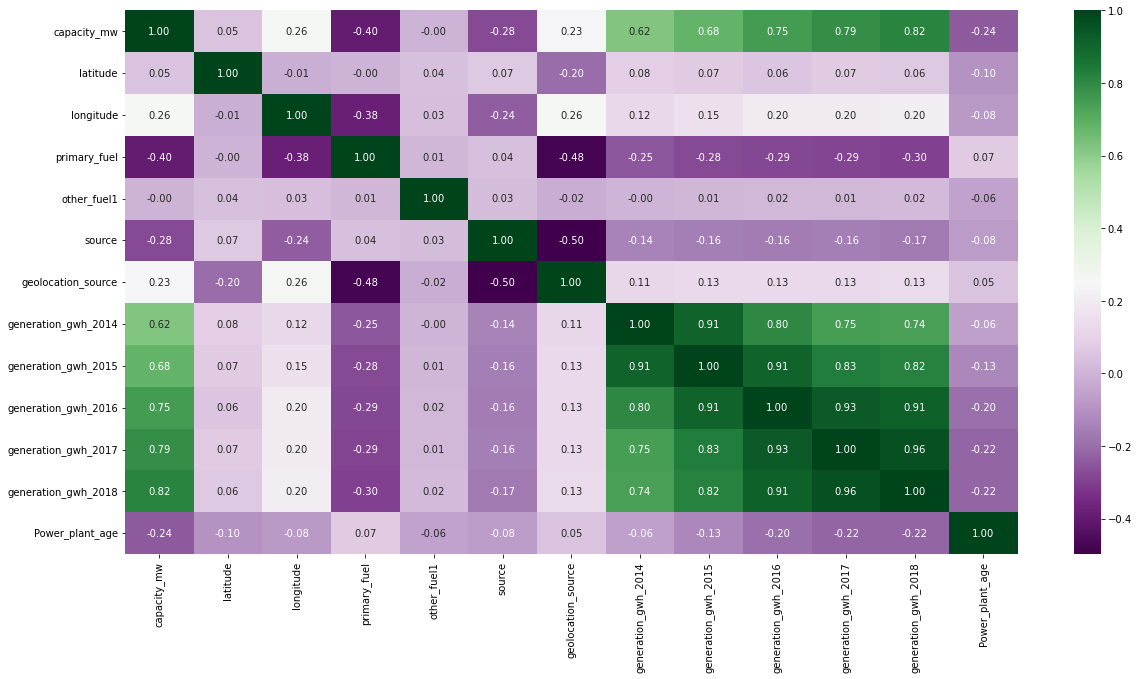

In [159]:
#Plotting the Heatmap of Correlation

corr = df_new.corr()
plt.figure(figsize=(20,10), facecolor='white')
sns.heatmap(corr, annot=True,cmap='PRGn',fmt='.2f')
plt.show()

**Observations:**

* Capacity is highly correlated with Electricity generation of 2018,2017,2016,2015,2014 respectively.
* There is a negative Correlation of 40% with primary fuel.
* Least correlated with latitude and other_fuel1

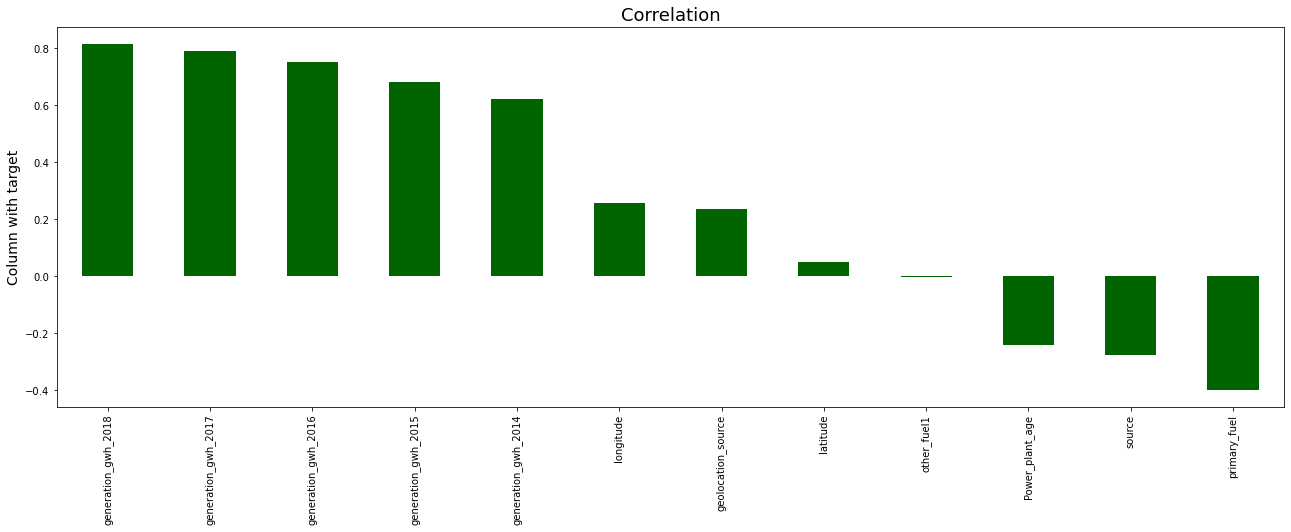

In [160]:
#Visualization of the Correlation Metrics

plt.figure(figsize=(22,7))
df_new.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='darkgreen')
plt.ylabel("Column with target",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

#### We can drop other_fuel1 and latitude from the daatset as the correlation is almost 0

In [161]:
#dropping the variables latitude and other_fuel1

df_new = df_new.drop(["other_fuel1"],axis=1)
df_new = df_new.drop(["latitude"],axis=1)

### d) Data Preprocessing

In [162]:
#capacity_mw as our target variable

x = df_new.drop("capacity_mw",axis=1)
y = df_new["capacity_mw"]

In [163]:
x.shape

(851, 10)

In [164]:
y.shape

(851,)

### e) Skewness

In [165]:
x.skew()

longitude              0.945877
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

In [167]:
#Removing the Skewness, source and primary fuel are categorical. so not taking

skew_cols=['longitude','generation_gwh_2014','generation_gwh_2015',
           'generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
x[skew_cols] = scaler.fit_transform(x[skew_cols].values)

In [168]:
#Checking skewness after removing skewness
x[skew_cols].skew()

longitude              0.000632
generation_gwh_2014   -0.104472
generation_gwh_2015   -0.094369
generation_gwh_2016   -0.088905
generation_gwh_2017   -0.069609
generation_gwh_2018   -0.090533
Power_plant_age        0.056495
dtype: float64

All the skewness is removed.

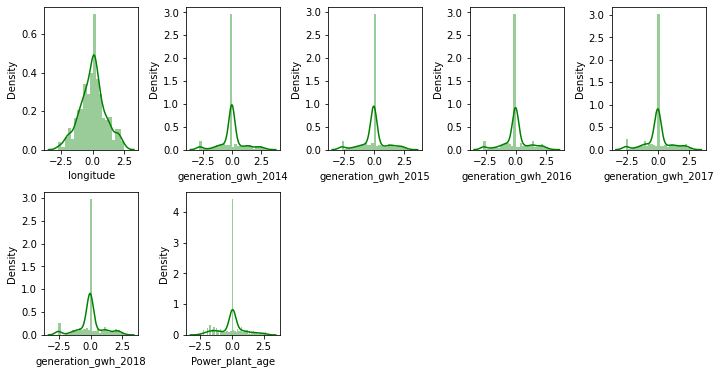

In [169]:
plt.figure(figsize=(10,10))
graph=1 

for column in x[skew_cols]:

    plt.subplot(4,5,graph)

    sns.distplot(x[column],color='green')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()

Every columns are distributed normally

### f) Standardization

In [170]:
scaler=StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [171]:
x.head()

longitude  primary_fuel    source  geolocation_source  generation_gwh_2014  \
0  -0.922017      1.175506  1.397951           -1.036523            -0.015816   
1  -0.499922     -0.975797  2.821796            0.407145            -0.015816   
2  -2.377221      1.605767 -0.529717            0.407145            -0.015816   
3   2.431155     -0.545536 -0.507812            0.407145            -0.244117   
4   1.262070     -0.975797 -0.507812            0.407145             1.395779   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0            -0.023850            -0.021809            -0.014102   
1            -0.023850            -0.021809            -0.014102   
2            -0.023850            -0.021809            -0.014102   
3             0.119032             0.129852            -0.179899   
4             2.192289             2.187260             1.925736   

   generation_gwh_2018  Power_plant_age  
0            -0.033504        -1.090824  
1            -0.033504         0.045548  
2            -0.033504         0.045548  
3            -0.171808        -0.249029  
4             2.254026        -1.761957

### g) VIF Factor

In [172]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [173]:
vif_calc()

   VIF Factor             features
0    1.310007            longitude
1    1.675863         primary_fuel
2    1.501219               source
3    1.874728   geolocation_source
4    3.424556  generation_gwh_2014
5    5.802701  generation_gwh_2015
6    9.491737  generation_gwh_2016
7    8.992422  generation_gwh_2017
8    8.446106  generation_gwh_2018
9    1.098973      Power_plant_age


All values are below 10. not treating the multicollinearity

## Importing libraries of regression problem

In [174]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### 5.2.1 Linear Regression

In [175]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.610037894447856 seen for random state: 43


In [176]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)

In [177]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)

print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))

The r2 score is: 0.610037894447856
The mean absolute error 207.59641823449329
The mean squared error 79077.74877373922


In [178]:
#Hyperparameter tuning for Linear Regression

par_grid =  {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_lm = GridSearchCV(estimator=lm, param_grid=par_grid, cv=5,n_jobs=1, verbose=1)

grid_lm.fit(x_train, y_train)
print("The best estimators:", grid_lm.best_estimator_)
print("The best score:", grid_lm.best_score_)
print("The best parameters:", grid_lm.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
The best estimators: LinearRegression(normalize=True)
The best score: 0.49405113486401203
The best parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [179]:
#RE INSTANTIATING WITH BEST PARAMETERS

grid_lm = LinearRegression(copy_X=True, fit_intercept=True, normalize=True)
grid_lm.fit(x_train, y_train)
y_pred1 = lm.predict(x_test)

print('The r2 score is:', r2_score(y_test, y_pred1))
print('The mean absolute error', mean_absolute_error(y_test, y_pred1))
print('The mean squared error', mean_squared_error(y_test, y_pred1))

The r2 score is: 0.610037894447856
The mean absolute error 207.59641823449329
The mean squared error 79077.74877373922


No change in result

In [180]:
cv = cross_val_score(lm, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.529415622194816


Text(0, 0.5, 'Predicted Y')

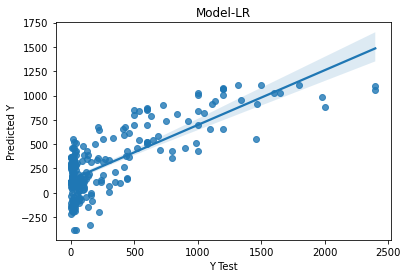

In [181]:
sns.regplot(x=y_test,y=y_pred1)
plt.title("Model-LR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### 5.2.2 Ridge Regression

In [182]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    Rd = Ridge()
    Rd.fit(x_train,y_train)
    pred = Rd.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.6101374468825302 seen for random state: 43


In [183]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)

In [184]:
pred = Rd.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred))
print('The mean absolute error', mean_absolute_error(y_test, pred))
print('The mean squared error', mean_squared_error(y_test, pred))
cv = cross_val_score(Rd, x,y,cv=5)
print('The cross validation score', cv.mean())

The r2 score is: 0.6193738652095586
The mean absolute error 206.71305491886045
The mean squared error 77184.5711035459
The cross validation score 0.5297324080222546


The mean squared error is very high and score is not good

Text(0, 0.5, 'Predicted Y')

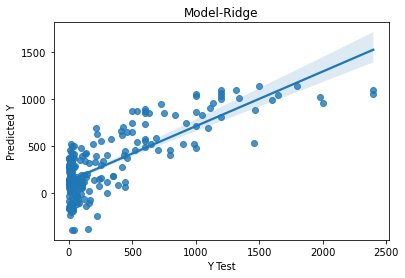

In [185]:
sns.regplot(x=y_test,y=pred)
plt.title("Model-Ridge")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### 5.2.3 KNN Regressor

In [191]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    knn = KNeighborsRegressor()
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.8157782563710492 seen for random state: 43


In [192]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)

In [193]:
pred_knn = knn.predict(x_test)

print('The r2 score is:', r2_score(y_test, pred_knn))
print('The mean absolute error', mean_absolute_error(y_test, pred_knn))
print('The mean squared error', mean_squared_error(y_test, pred_knn))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

The r2 score is: 0.870357226519303
The mean absolute error 84.24068125
The mean squared error 26289.3715201425
root_mean_squared_error: 162.1399750836989


In [194]:
#Hyperparameter tuning of KNN

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

knn = KNeighborsRegressor()
knn_grid_param={"n_neighbors": [3,5,7],
                "weights": ["uniform","distance"],
                'metric' : ['minkowski','euclidean','manhattan'],
               'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

gd_sr=GridSearchCV(estimator=knn,param_grid=knn_grid_param,scoring='r2',cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
0.7604462224987472


In [195]:
#Reinstating with best params:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)
knn_H = KNeighborsRegressor(algorithm='brute',metric='manhattan',n_neighbors=7,weights='distance')
knn_H.fit(x_train,y_train)
predknn = knn_H.predict(x_test)

print('The r2 score is:', r2_score(y_test, predknn))
print('The mean absolute error', mean_absolute_error(y_test, predknn))
print('The mean squared error', mean_squared_error(y_test, predknn))

The r2 score is: 0.8292052267230343
The mean absolute error 94.14181417781182
The mean squared error 34634.304156144906


**The score is lesser after hyper parameter tuning**

Text(0, 0.5, 'Predicted Y')

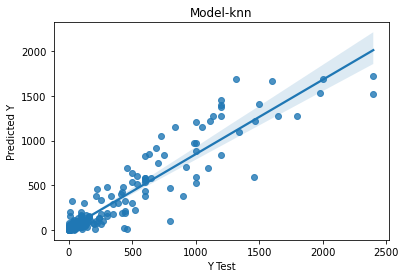

In [196]:
sns.regplot(x=y_test,y=pred_knn)
plt.title("Model-knn")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### 5.2.4 Random Forest Regressor

In [197]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    rdf = RandomForestRegressor()
    rdf.fit(x_train,y_train)
    pred = rdf.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.846797291054443 seen for random state: 27


In [198]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)

In [199]:
pred_rdf = rdf.predict(x_test)

print('The r2 score is:', r2_score(y_test, pred_rdf))
print('The mean absolute error', mean_absolute_error(y_test, pred_rdf))
print('The mean squared error', mean_squared_error(y_test, pred_rdf))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,pred_rdf)))

The r2 score is: 0.953614835364859
The mean absolute error 49.003360574154804
The mean squared error 8709.62045719141
root_mean_squared_error: 93.3253473456778


In [209]:
#HyperParameter Tuning for Random Forest Regressor

from sklearn.model_selection import RandomizedSearchCV

parameters={'criterion': ["squared_error", "absolute_error", "poisson"],
            'n_estimators':[100,200,300,400],
            'max_depth': [5,6,7,8,10,30],
            'max_features':['sqrt','log2',None],
            'bootstrap': [True, False]}

g=RandomizedSearchCV(RandomForestRegressor(),param_distributions = parameters,scoring='r2',
                     cv = 5, n_iter = 10, n_jobs=-1)
g.fit(x_train,y_train)
pred_g=g.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred_g))
print("\n The best estimator across ALL searched params:\n", g.best_estimator_)
print("\n The best score across ALL searched params:\n", g.best_score_)
print("\n The best parameters across ALL searched params:\n",g.best_params_)

The r2 score is: 0.845172071800844

 The best estimator across ALL searched params:
 RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      max_features=None, n_estimators=400)

 The best score across ALL searched params:
 0.7696586062728801

 The best parameters across ALL searched params:
 {'n_estimators': 400, 'max_features': None, 'max_depth': 10, 'criterion': 'absolute_error', 'bootstrap': True}


In [212]:
rdf_H = RandomForestRegressor(max_depth=10,max_features=None,bootstrap= True,
                            criterion='absolute_error',n_estimators=400)
rdf_H.fit(x_train,y_train)
predrdf = rdf_H.predict(x_test)
print('The r2 score is:', r2_score(y_test, predrdf))
print('The mean absolute error', mean_absolute_error(y_test, predrdf))
print('The mean squared error', mean_squared_error(y_test, predrdf))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,predrdf)))

The r2 score is: 0.8469770016696128
The mean absolute error 86.16269663085937
The mean squared error 28732.72623181364
root_mean_squared_error: 169.5073043612388


Model without hyperparameter tuning has good score

Text(0, 0.5, 'Predicted Y')

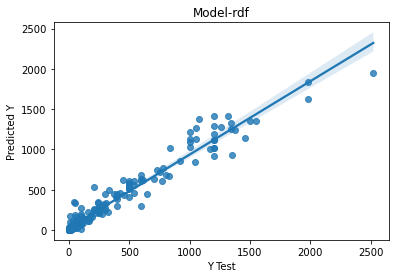

In [202]:
sns.regplot(x=y_test,y=pred_rdf)
plt.title("Model-rdf")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


This is a Good Model

### 5.2.5 XGB Regressor

In [203]:
from xgboost import XGBRegressor

#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    XGB=XGBRegressor()
    XGB.fit(x_train,y_train)
    xgb_pred=XGB.predict(x_test)
    acc = r2_score(y_test, xgb_pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.8343428427185048 seen for random state: 27


In [204]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)

In [205]:
XGB=XGBRegressor()
XGB.fit(x_train,y_train)
xgb_pred=XGB.predict(x_test)
print('The r2 score is:', r2_score(y_test,xgb_pred))
print('The mean squared error', mean_squared_error(y_test,xgb_pred))
print('The mean absolute error', mean_absolute_error(y_test,xgb_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,xgb_pred)))

The r2 score is: 0.8343428427185048
The mean squared error 31105.009053822072
The mean absolute error 96.00107558441442
root_mean_squared_error: 176.3661221828673


In [208]:
param_grid = dict(learning_rate=[0.01, 0.03, 0.05, 0.1], max_depth=[5, 7, 10], 
                  n_estimators=[100, 200,300],gamma=[0.05, 0.5],
                  reg_alpha=[0, 0.5],reg_lambda=[1, 0])

model = XGBRegressor(random_state=max_RS, verbosity=1)

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='r2')

best_model = grid_search.fit(x_train, y_train)
print('Optimum parameters', best_model.best_params_)

Optimum parameters {'gamma': 0.5, 'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 0}


In [210]:
XGB_H=XGBRegressor(learning_rate=0.03,max_depth=5,n_estimators=300,
                   reg_alpha=0,reg_lambda=0,gamma=0.5)
XGB_H.fit(x_train,y_train)
xgbpred=XGB_H.predict(x_test)
print('The r2 score is:', r2_score(y_test,xgbpred))
print('The mean squared error', mean_squared_error(y_test,xgbpred))
print('The mean absolute error', mean_absolute_error(y_test,xgbpred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,xgbpred)))

The r2 score is: 0.8214030540088078
The mean squared error 33534.67917236533
The mean absolute error 94.15857220293582
root_mean_squared_error: 183.12476395169858


Score without hyper parameter is good

Text(0, 0.5, 'Predicted Y')

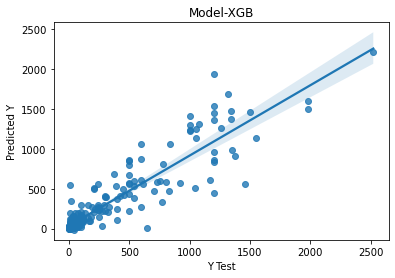

In [211]:
sns.regplot(x=y_test,y=xgb_pred)
plt.title("Model-XGB")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### 5.2.6 SGD Regressor

In [227]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    sgd=SGDRegressor()
    sgd.fit(x_train,y_train)
    pred=sgd.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.614033898057412 seen for random state: 43


In [228]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)

In [229]:
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
cv = cross_val_score(sgd, x,y,cv=5)
print('The cross validation score', cv.mean())
print('The mean squared error', mean_squared_error(y_test,pred))
print('The mean absolute error', mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.6091486352495483
The cross validation score 0.5323007044351094
The mean squared error 79258.07556569495
The mean absolute error 207.24209607143666
root_mean_squared_error: 281.52810794962363


Text(0, 0.5, 'Predicted Y')

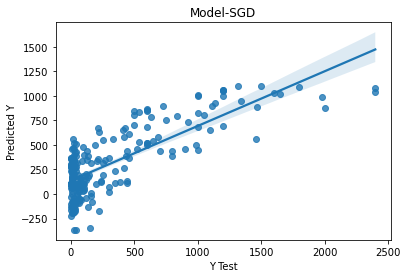

In [230]:
sns.regplot(x=y_test,y=pred)
plt.title("Model-SGD")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### 5.2.7 GradientBoosting Regressor

In [217]:
#Selecting the best random state to get maximum accuracy.

from sklearn.ensemble import GradientBoostingRegressor
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    GBR=GradientBoostingRegressor()
    GBR.fit(x_train,y_train)
    pred=GBR.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.8253377091707386 seen for random state: 27


In [218]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=max_RS)

In [234]:
pred_gbr=GBR.predict(x_test)
print('R2_score:',r2_score(y_test,pred_gbr))
print('mean_squared_error:',mean_squared_error(y_test,pred_gbr))
print('mean_absolute_error:',mean_absolute_error(y_test,pred_gbr))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,pred_gbr)))

R2_score: 0.9209238039697729
mean_squared_error: 16035.321059741045
mean_absolute_error: 62.15696530037371
root_mean_squared_error: 126.63064818495184


In [223]:
#Hyper parameter tuning for Gradient Boosting Regressor

params = {"n_estimators" : np.linspace(100,500,5, dtype = int),
          "subsample" : [0.2, 0.5, 0.8, 1.0],
          "min_samples_leaf" : [0.01],
          "random_state" : [27],
          "ccp_alpha" : [0, 0.1,0.2,0.3]}
model = GradientBoostingRegressor(random_state=max_RS)

grid_search = GridSearchCV(estimator=model,
                           param_grid=params,
                           scoring='r2')

grid_search.fit(x_train, y_train)
print("\n The best estimator across ALL searched params:\n", grid_search.best_estimator_)
print("\n The best score across ALL searched params:\n", grid_search.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)


 The best estimator across ALL searched params:
 GradientBoostingRegressor(ccp_alpha=0, min_samples_leaf=0.01, random_state=27,
                          subsample=0.5)

 The best score across ALL searched params:
 0.7496377994192545

 The best parameters across ALL searched params:
 {'ccp_alpha': 0, 'min_samples_leaf': 0.01, 'n_estimators': 100, 'random_state': 27, 'subsample': 0.5}


In [231]:
#Reinstating with tuned parameters:
GBR_H=GradientBoostingRegressor(ccp_alpha=0,min_samples_leaf=0.01,n_estimators=100,
                               random_state=27,subsample=0.5)
GBR_H.fit(x_train,y_train)
predgbr=GBR_H.predict(x_test)
print('R2_score:',r2_score(y_test,predgbr))
print('mean_squared_error:',mean_squared_error(y_test,predgbr))
print('mean_absolute_error:',mean_absolute_error(y_test,predgbr))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,predgbr)))

R2_score: 0.8104939313184497
mean_squared_error: 38428.639800989025
mean_absolute_error: 99.08794417939748
root_mean_squared_error: 196.03224173841664


Score is not good after tuning

Text(0, 0.5, 'Predicted Y')

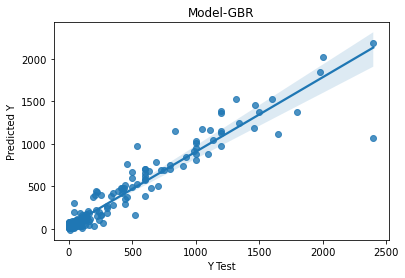

In [235]:
sns.regplot(x=y_test,y=pred_gbr)
plt.title("Model-GBR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Cross Validation

In [236]:
cv = cross_val_score(lm, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.529415622194816


In [237]:
cv = cross_val_score(Rd, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.5297324080222546


In [238]:
cv = cross_val_score(rdf, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.7805112086316793


In [239]:
cv = cross_val_score(sgd, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.5302874640258469


In [240]:
cv = cross_val_score(XGB, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.748447554052104


In [241]:
cv = cross_val_score(knn, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.7247954918285464


In [242]:
cv = cross_val_score(GBR, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.7508620083129915


In [243]:
np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=5))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             RandomForestRegressor(),
             SGDRegressor(),  
             XGBRegressor(),
             KNeighborsRegressor(),
             GradientBoostingRegressor()]
            


names = ['LR','Rd','rdf','sgd','xgb','knn','gbr']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 94075.250860, 27414.367546
Rd    : 94022.542140, 27444.559976
rdf    : 45073.516984, 19086.475599
sgd    : 93863.367042, 27772.423723
xgb    : 50894.825707, 17160.194130
knn    : 55884.509117, 20578.391322
gbr    : 51766.692133, 19947.286896


**Random Forest:**
* The r2 score is: 0.953614835364859
* The mean absolute error 49.003360574154804
* The mean squared error 8709.62045719141
* root_mean_squared_error: 93.3253473456778
* The cross validation score 0.7805112086316793
* Lowest neg_mean_squared_error   : 45073.516984, 19086.475599

## I am taking Random Forest as final Model

In [244]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    Final_model = RandomForestRegressor()
    Final_model.fit(x_train,y_train)
    pred = Final_model.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.8480394271242051 seen for random state: 27


In [248]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)
pred_rdf = Final_model.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred_rdf))
print('The mean absolute error', mean_absolute_error(y_test, pred_rdf))
print('The mean squared error', mean_squared_error(y_test, pred_rdf))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,pred_rdf)))

The r2 score is: 0.9475644266364154
The mean absolute error 50.49042097604493
The mean squared error 9845.68980285672
root_mean_squared_error: 99.22544937089839


# Saving the Model

In [249]:
# Saving the model using .pkl

import joblib
joblib.dump(Final_model,"Global_power_plant_capacity.pkl")

['Global_power_plant_capacity.pkl']

## Predictions

In [250]:
#load the model
model=joblib.load("Global_power_plant_capacity.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([  98.285     ,   35.532     ,   39.315     ,   95.6768    ,
         47.202     ,    2.28      , 1145.3       ,   28.54      ,
         10.58      ,  665.535     ,  417.449     ,   26.777     ,
        567.745     ,   21.631     , 1086.925     ,  999.266     ,
        220.486     ,  552.63314   ,    4.682     ,   47.988     ,
         12.135     ,  195.853     ,   73.8515    ,  276.93273   ,
         10.541     ,   79.542     ,   29.579     ,  121.598     ,
        196.85040667,  597.3756    ,   20.255     ,  868.9414    ,
         10.42      ,  583.4228    ,    4.96      ,   84.365     ,
         82.3528    ,   27.44      , 1044.741     ,    8.009     ,
       1626.175     ,   18.88      ,  295.003     ,   68.975     ,
        576.64      , 1123.716     ,   24.846     ,  137.9764    ,
        214.0572    ,   61.754     ,   17.68      ,   45.2355    ,
       1096.21      ,   34.766     ,    4.495     ,   38.65018939,
        277.088     ,   63.199     ,   27.824     , 1238.88   

In [251]:
base = pd.DataFrame()
base["actual"] = y_test
base["predictions"] = prediction

In [252]:
base

actual  predictions
466   90.00      98.2850
658   50.00      35.5320
169   33.75      39.3150
344   72.00      95.6768
609   40.00      47.2020
..      ...          ...
127    5.00       2.5600
370  400.00     360.8400
548   90.00      84.5810
135  540.00     593.6552
763    5.00       4.5200

[256 rows x 2 columns]

## values are almost similar